<a href="https://colab.research.google.com/github/adfhsjt/PCVK25_3F_02/blob/main/CM_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Tampilkan histogram tiap citra dan analisis distribusi intensitasnya.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from google.colab.patches import cv_imshow

In [ ]:
timun={}

timun['terang'] = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/CM1/images/terang.jpg')
timun['gelap'] = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/CM1/images/gelap.jpg')
timun['setengah'] = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/CM1/images/gelap_terang.jpg')

# timun['terang'] = cv.imread('/content/terang.jpg')
# timun['gelap'] = cv.imread('/content/gelap.jpg')
# timun['setengah'] = cv.imread('/content/gelap_terang.jpg')

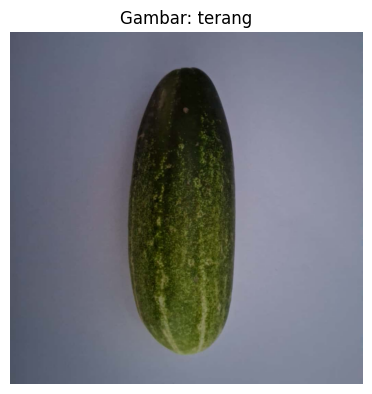

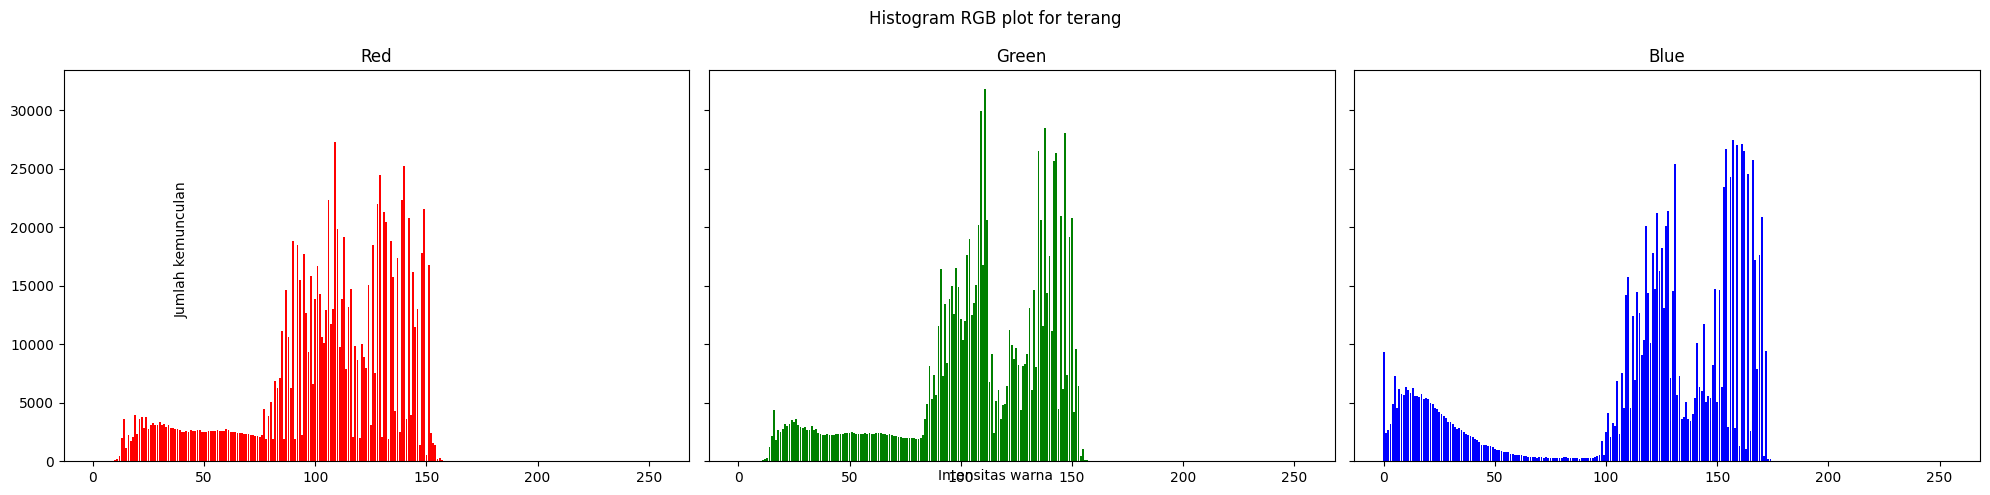

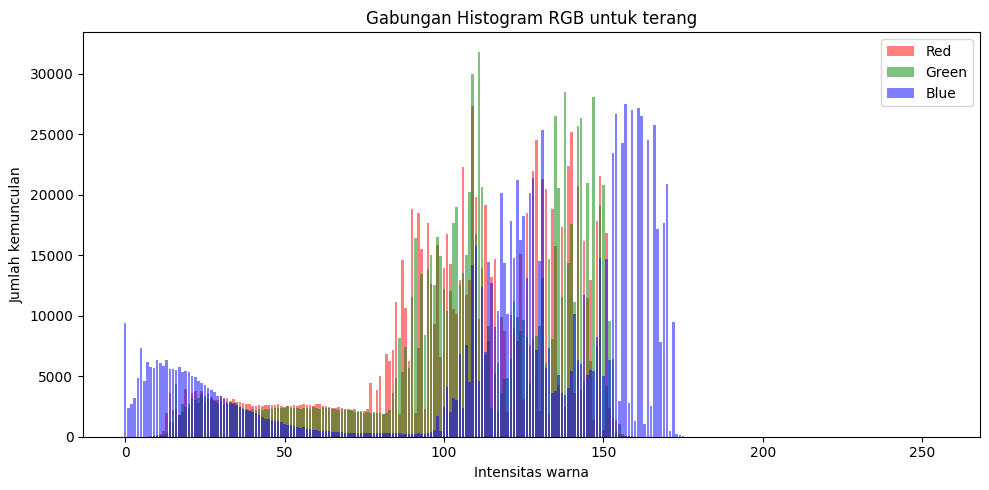

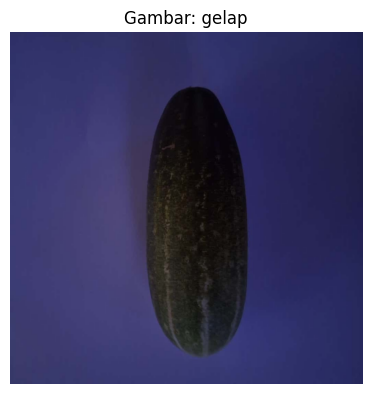

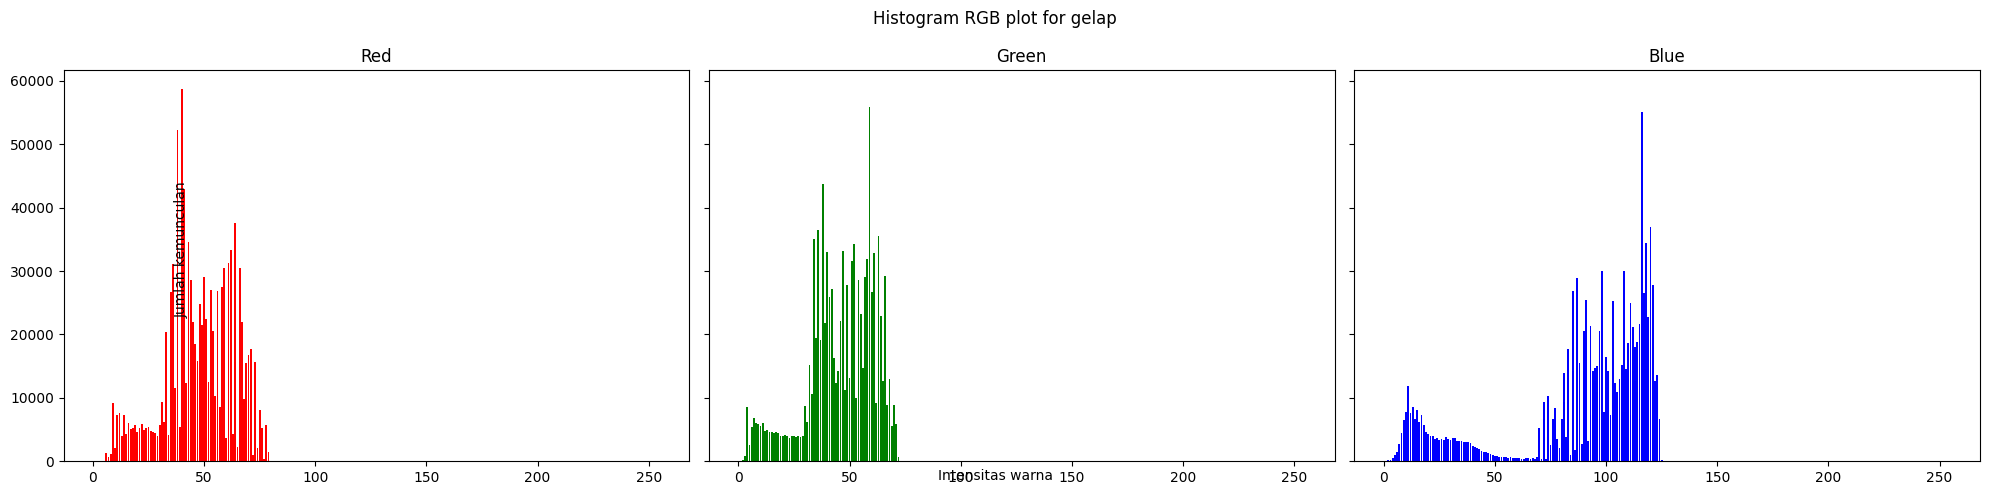

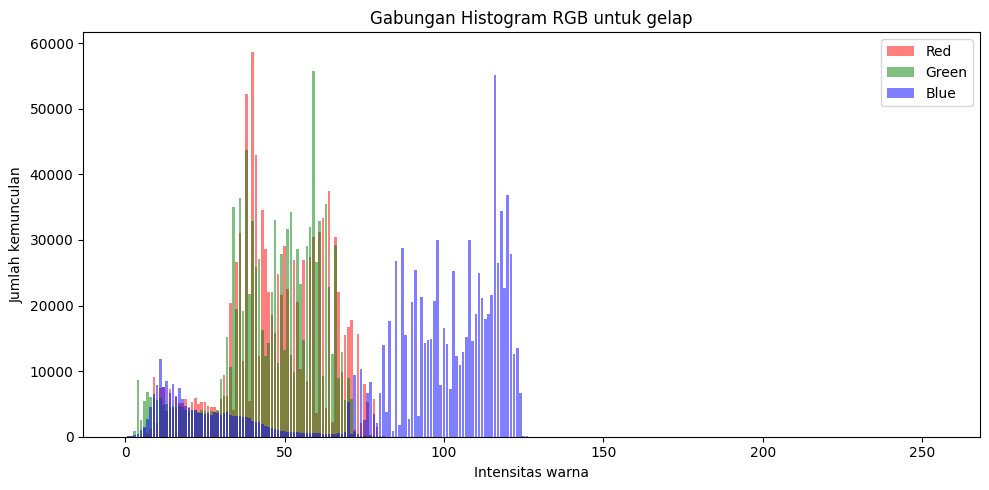

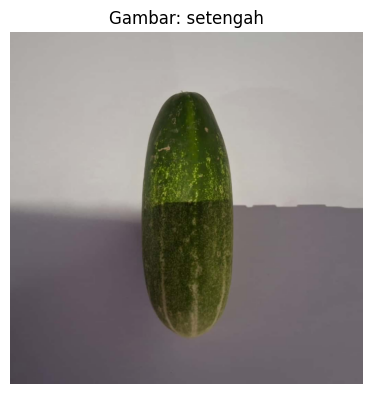

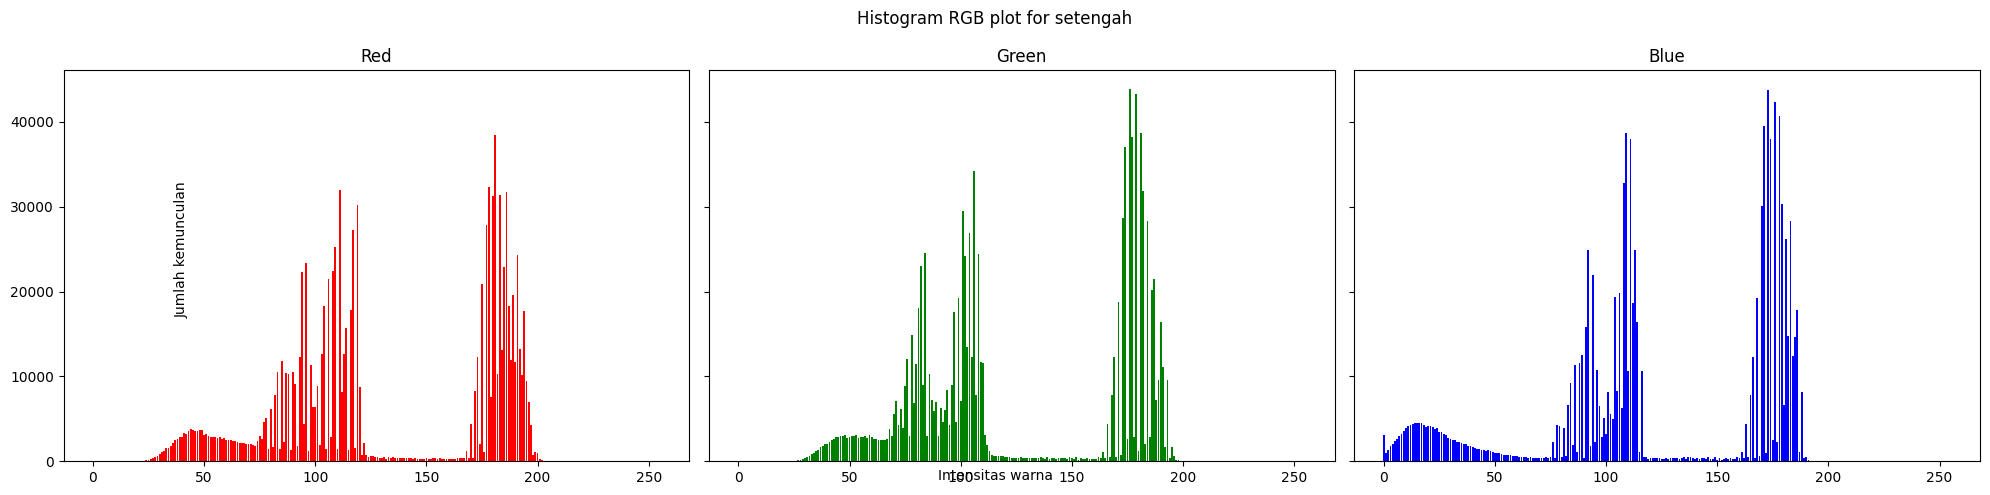

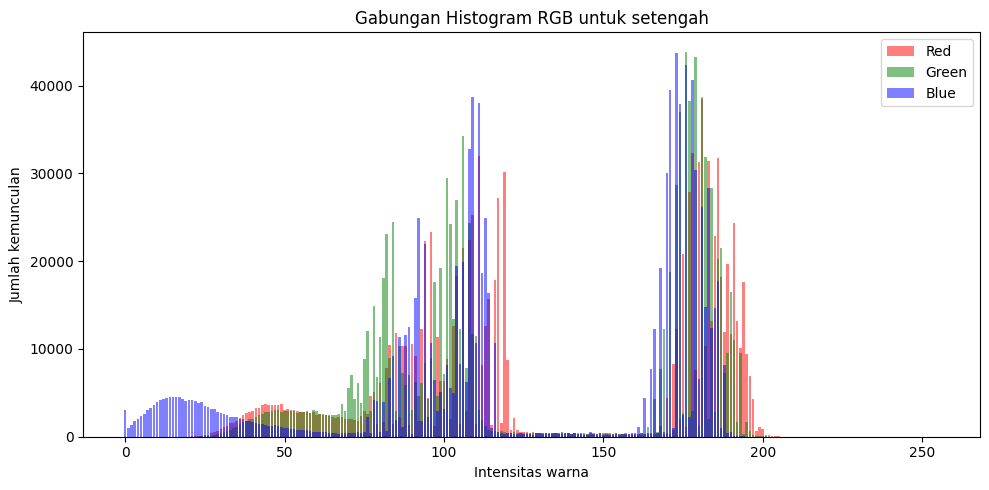

In [ ]:
for key in timun:
    timun[key] = cv.cvtColor(timun[key], cv.COLOR_BGR2RGB)
    image_to_process = timun[key]
    height, width, depth = np.shape(image_to_process)
    names = np.arange(256)

    red = [0] * 256
    green = [0] * 256
    blue = [0] * 256

    for y in range(height):
        for x in range(width):
            red[image_to_process[y][x][0]] += 1
            green[image_to_process[y][x][1]] += 1
            blue[image_to_process[y][x][2]] += 1

    names = np.arange(256)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(timun[key])
    plt.title(f"Gambar: {key}")
    plt.axis("off")

    fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle(f'Histogram RGB plot for {key}')
    fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas warna', ha='center')
    axs[0].bar(names, red, color='red')
    axs[0].set_title('Red')
    axs[1].bar(names, green, color='green')
    axs[1].set_title('Green')
    axs[2].bar(names, blue, color='blue')
    axs[2].set_title('Blue')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.bar(names, red, color='red', alpha=0.5, label='Red')
    plt.bar(names, green, color='green', alpha=0.5, label='Green')
    plt.bar(names, blue, color='blue', alpha=0.5, label='Blue')
    plt.title(f'Gabungan Histogram RGB untuk {key}')
    plt.xlabel('Intensitas warna')
    plt.ylabel('Jumlah kemunculan')
    plt.legend()
    plt.tight_layout()
    plt.show()

2. Terapkan transformasi brightness dan contrast (linear/log brightness).  
o Tentukan nilai b (brightness) dan a (contrast) yang sesuai agar data
tampak natural seperti data asli.

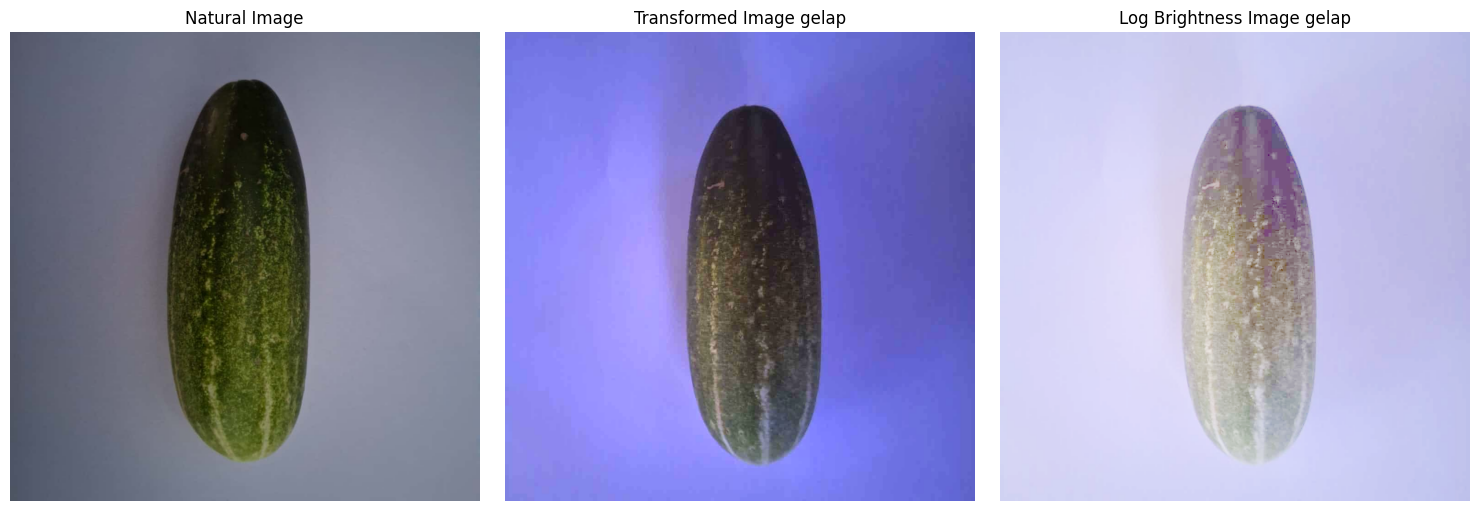

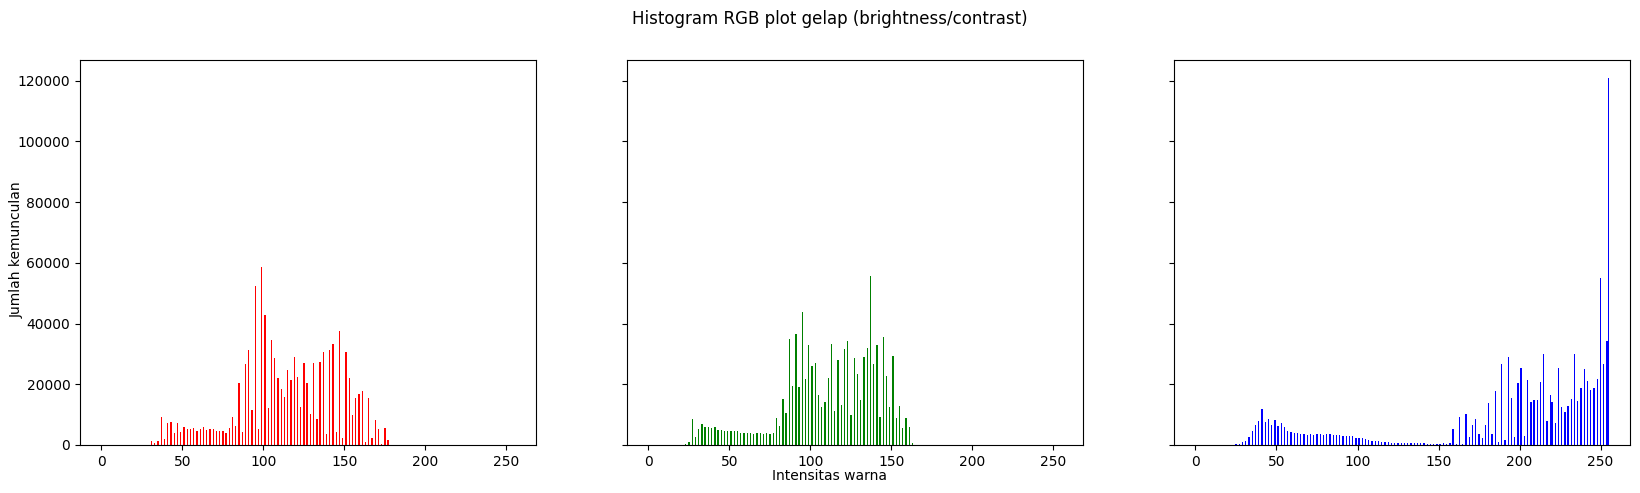

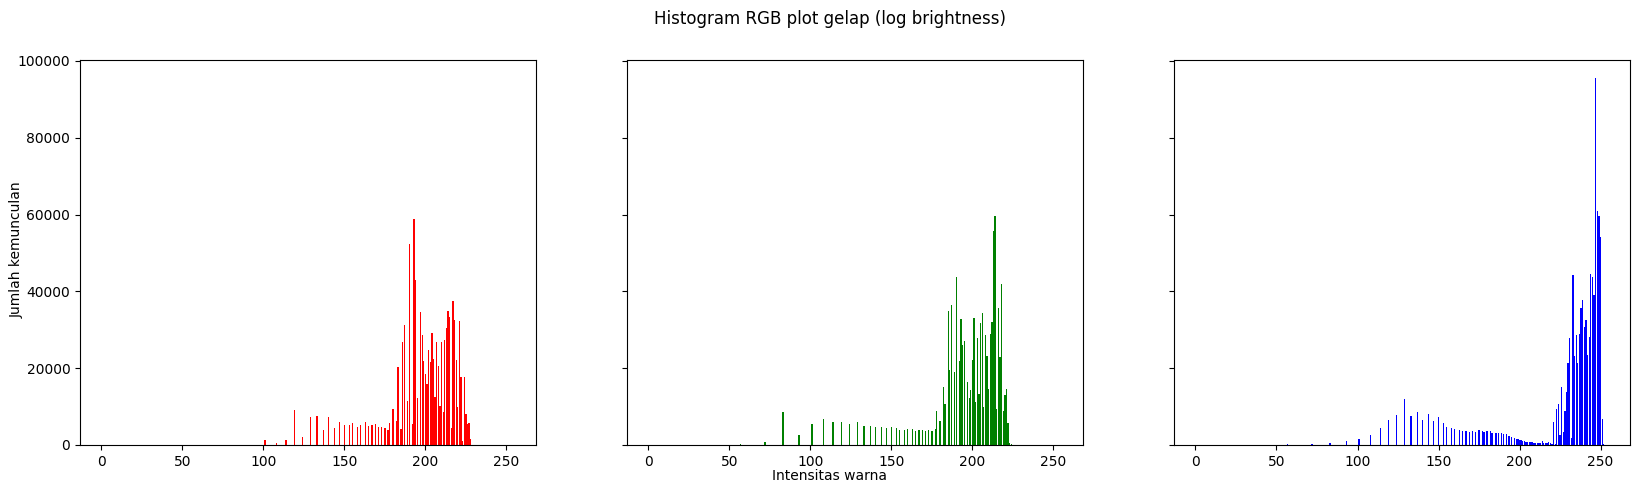

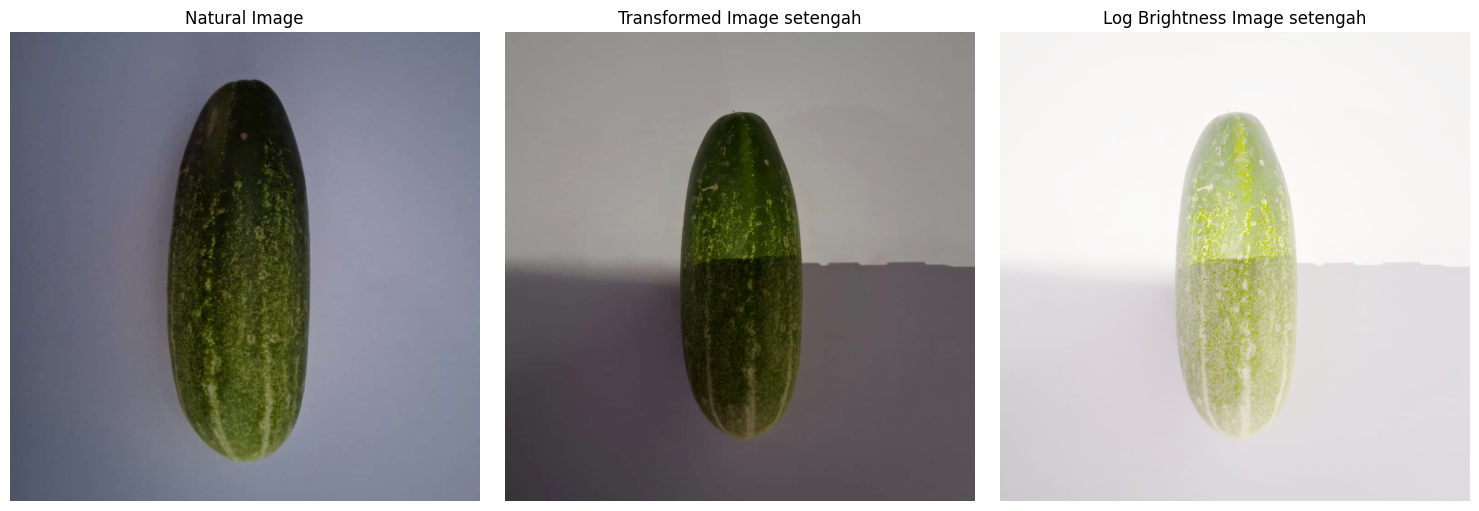

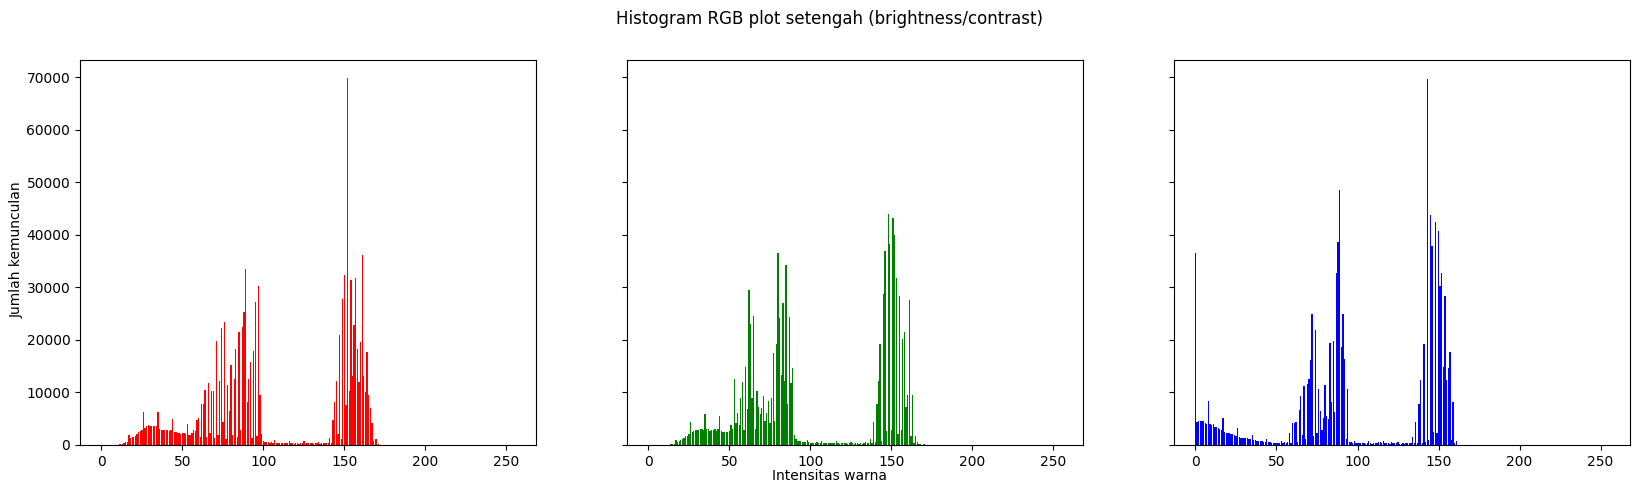

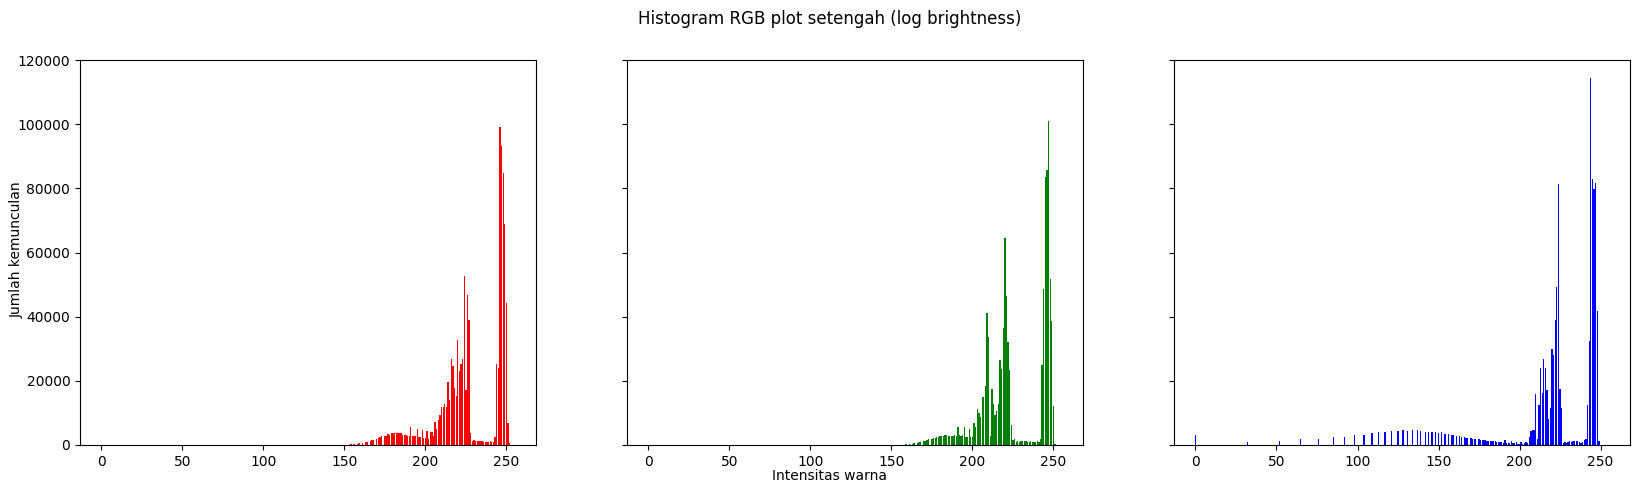

In [ ]:
timun2 = {}
for key in timun:
    timun2[key] = timun[key].copy()

a_values = {'gelap': 1.99, 'setengah': 0.9}
b_values = {'gelap': 20, 'setengah': -10}

for key in ['gelap', 'setengah']:
    image_to_process = timun2[key]
    height, width, depth = np.shape(image_to_process)
    a = a_values[key]
    b = b_values[key]
    transformed = np.clip(a * image_to_process + b, 0, 255).astype(np.uint8)
    img_float = image_to_process.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    image_log = c * np.log(1 + img_float)
    image_log = np.clip(image_log, 0, 255).astype(np.uint8)
    red = [0] * 256
    green = [0] * 256
    blue = [0] * 256
    for y in range(height):
        for x in range(width):
            red[transformed[y][x][0]] += 1
            green[transformed[y][x][1]] += 1
            blue[transformed[y][x][2]] += 1
    red_log = [0] * 256
    green_log = [0] * 256
    blue_log = [0] * 256
    for y in range(height):
        for x in range(width):
            red_log[image_log[y][x][0]] += 1
            green_log[image_log[y][x][1]] += 1
            blue_log[image_log[y][x][2]] += 1
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Natural Image')
    plt.imshow(timun['terang'])
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.title(f'Transformed Image {key}')
    plt.imshow(transformed)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.title(f'Log Brightness Image {key}')
    plt.imshow(image_log)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    names = np.arange(256)
    fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle(f'Histogram RGB plot {key} (brightness/contrast)')
    fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas warna', ha='center')
    axs[0].bar(names, red, color='red')
    axs[1].bar(names, green, color='green')
    axs[2].bar(names, blue, color='blue')
    plt.show()
    fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle(f'Histogram RGB plot {key} (log brightness)')
    fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas warna', ha='center')
    axs[0].bar(names, red_log, color='red')
    axs[1].bar(names, green_log, color='green')
    axs[2].bar(names, blue_log, color='blue')
    plt.show()

3. Lakukan histogram equalization untuk memperbaiki sebaran kontras.  
o Bandingkan hasil visual dan histogram sebelum–sesudah.  
o Perhatikan apakah motif dan detail kain lebih terlihat jelas.  
o Pastikan tekstur daun atau permukaan sayur menjadi lebih terlihat.  

Versi RGB

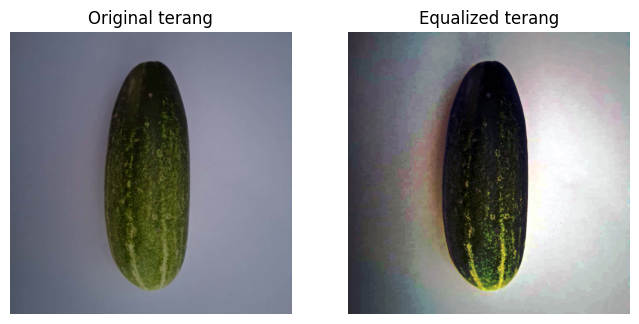

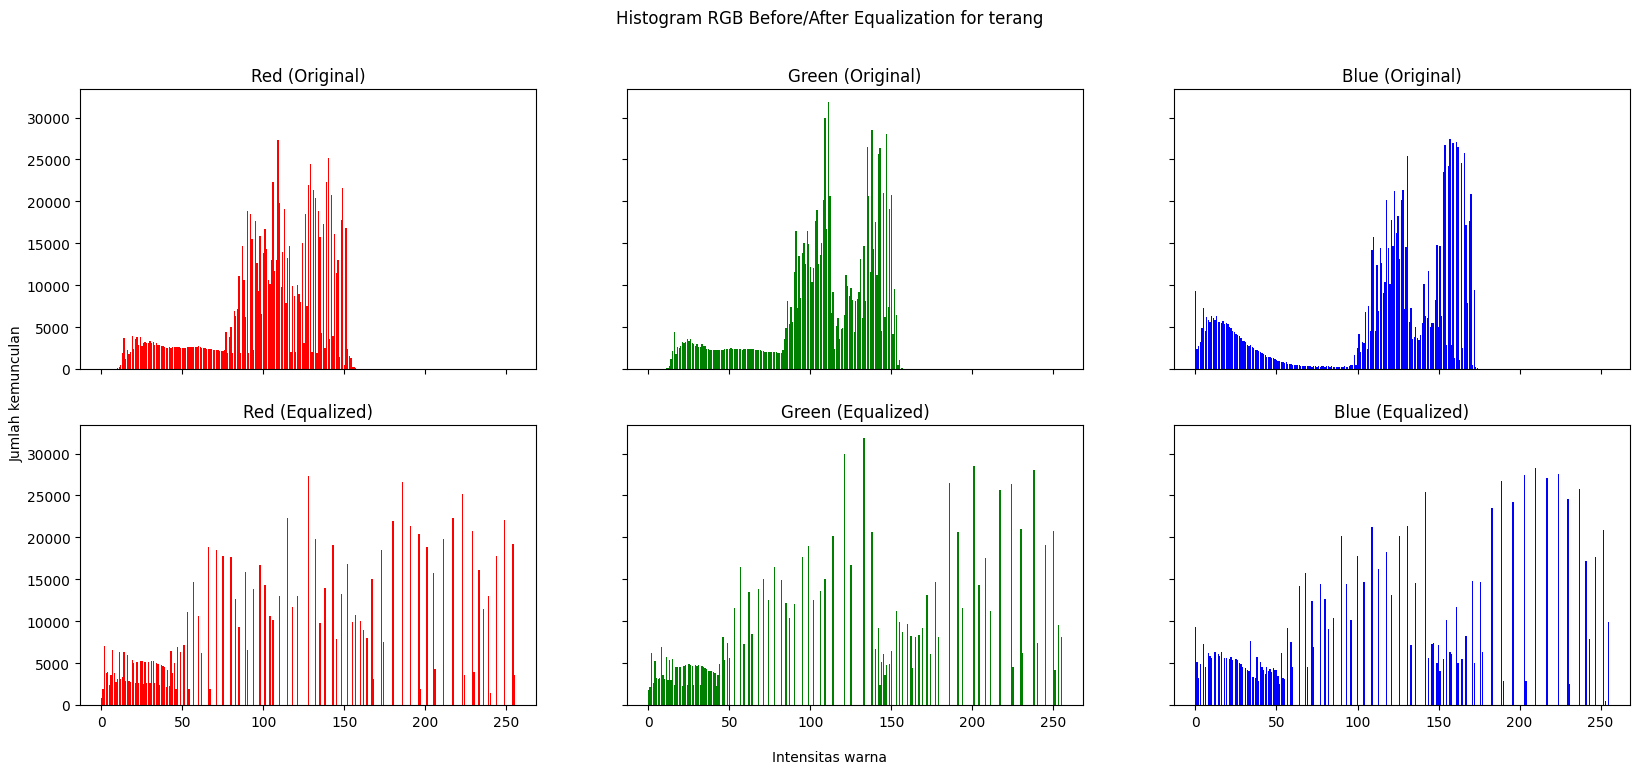

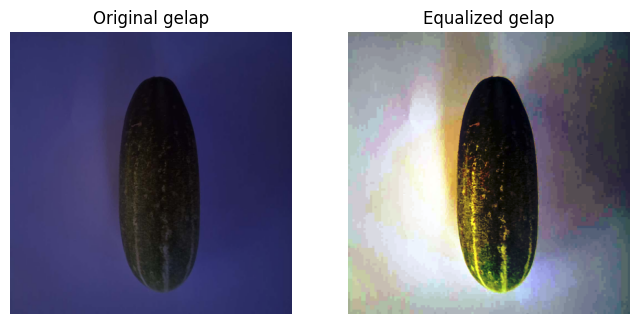

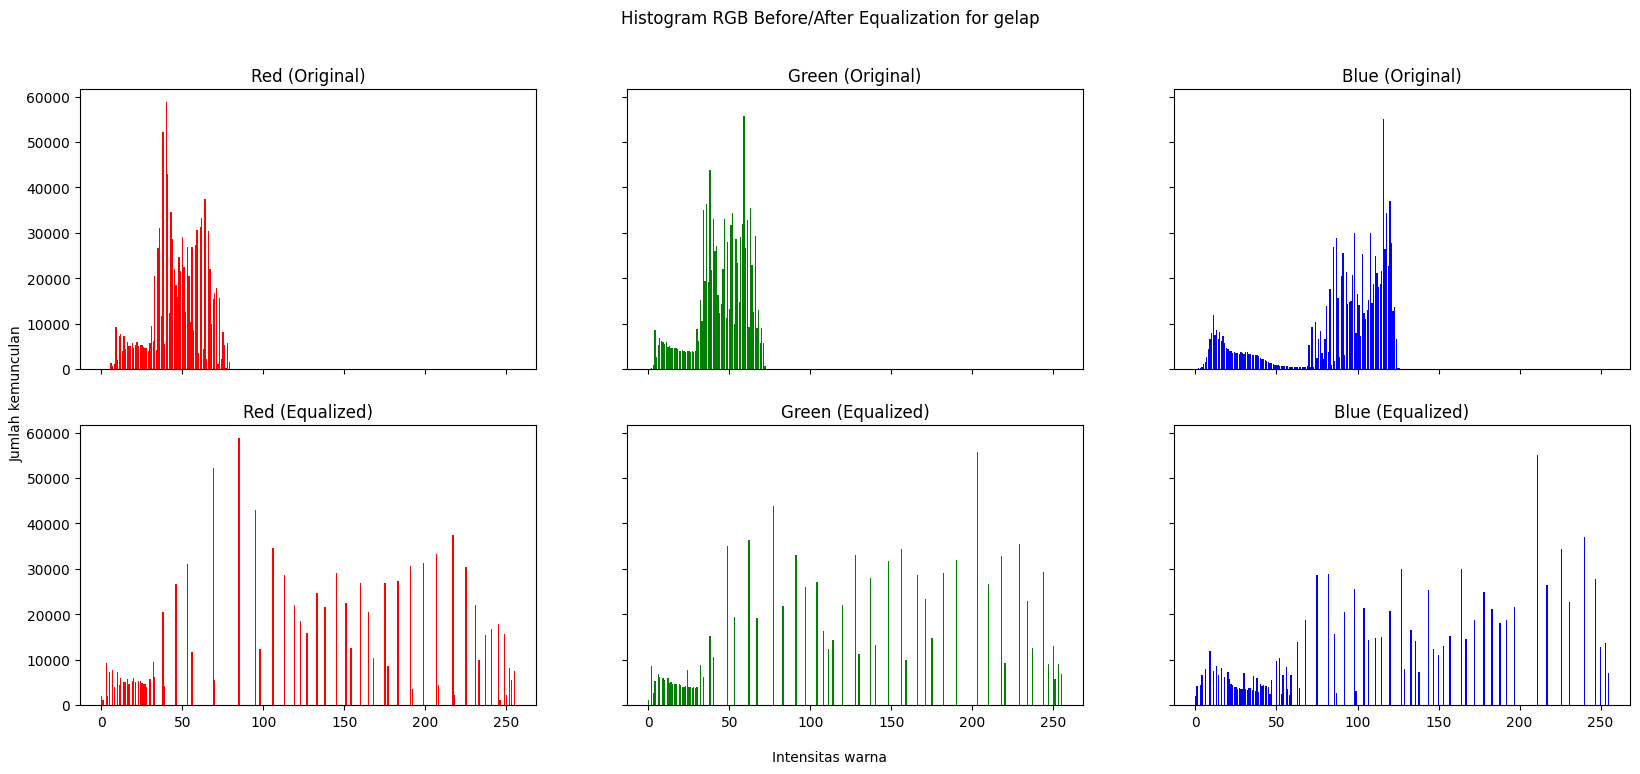

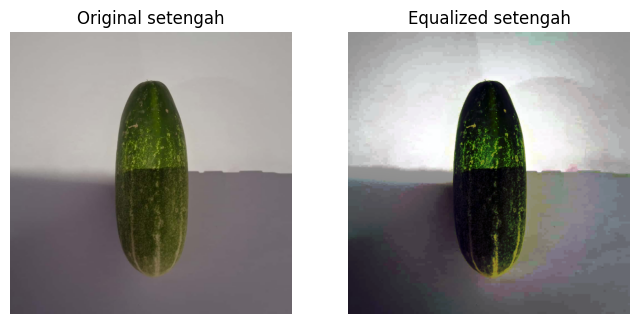

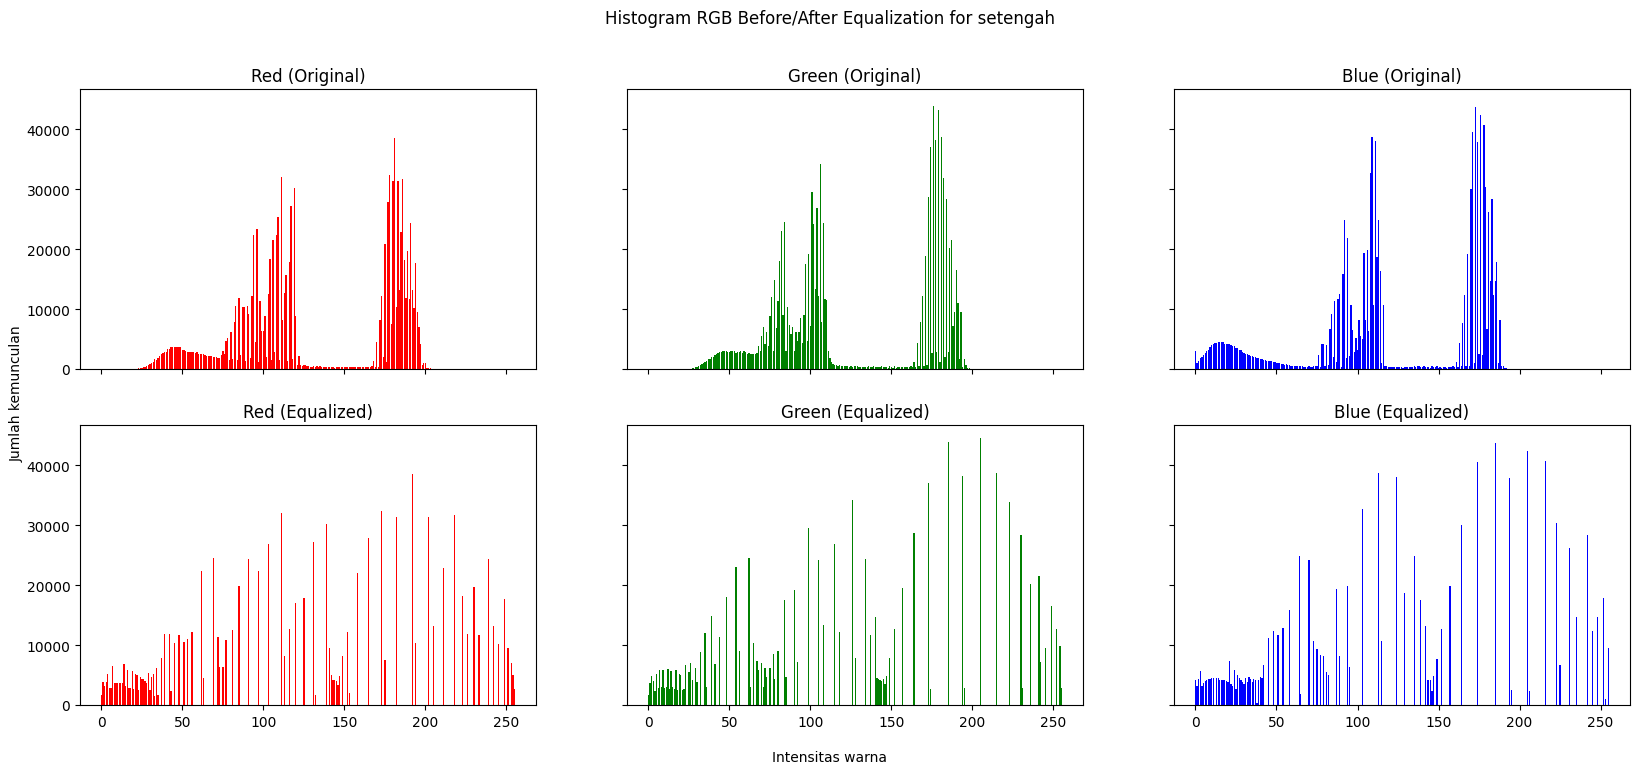

In [ ]:
timun3 = {}
for key in timun:
    timun3[key] = timun[key].copy()
    image_to_process = timun3[key]

    height, width, depth = np.shape(image_to_process)
    red = [0] * 256
    green = [0] * 256
    blue = [0] * 256

    for y in range(height):
        for x in range(width):
            red[image_to_process[y][x][0]] += 1
            green[image_to_process[y][x][1]] += 1
            blue[image_to_process[y][x][2]] += 1

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image_to_process)
    plt.title(f'Original {key}')
    plt.axis('off')

    img_eq = image_to_process.copy()
    img_eq[:,:,0] = cv.equalizeHist(img_eq[:,:,0])
    img_eq[:,:,1] = cv.equalizeHist(img_eq[:,:,1])
    img_eq[:,:,2] = cv.equalizeHist(img_eq[:,:,2])

    plt.subplot(1, 2, 2)
    plt.imshow(img_eq)
    plt.title(f'Equalized {key}')
    plt.axis('off')
    plt.show()

    names = np.arange(256)
    fig, axs = plt.subplots(2, 3, figsize=[20, 8], sharex=True, sharey=True)
    fig.suptitle(f'Histogram RGB Before/After Equalization for {key}')
    fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas warna', ha='center')

    red_eq = [0] * 256
    green_eq = [0] * 256
    blue_eq = [0] * 256
    for y in range(height):
        for x in range(width):
            red_eq[img_eq[y][x][0]] += 1
            green_eq[img_eq[y][x][1]] += 1
            blue_eq[img_eq[y][x][2]] += 1

    axs[0,0].bar(names, red, color='red')
    axs[0,0].set_title('Red (Original)')
    axs[0,1].bar(names, green, color='green')
    axs[0,1].set_title('Green (Original)')
    axs[0,2].bar(names, blue, color='blue')
    axs[0,2].set_title('Blue (Original)')

    axs[1,0].bar(names, red_eq, color='red')
    axs[1,0].set_title('Red (Equalized)')
    axs[1,1].bar(names, green_eq, color='green')
    axs[1,1].set_title('Green (Equalized)')
    axs[1,2].bar(names, blue_eq, color='blue')
    axs[1,2].set_title('Blue (Equalized)')
    plt.show()

4. Terapkan filter spasial:  
o Low-pass filter untuk menghaluskan noise atau tekstur berlebih pada
permukaan kain, untuk menghaluskan noise pada permukaan atau
bayangan di sekitar sayur.  
o High-pass atau Laplacian filter untuk menajamkan tepi motif batik atau
untuk menajamkan tepi daun, batang, atau detail tekstur pada sayur.

In [ ]:
import math
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = math.floor(((image_height - kernel_height + 2 * padding) / stride) + 1)
    output_width = math.floor(((image_width - kernel_width + 2 * padding) / stride) + 1)

    output = np.zeros((output_height, output_width))

    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    for y_out in range(output_height):
        for x_out in range(output_width):

            y_start = y_out * stride
            x_start = x_out * stride

            image_slice = padded_image[y_start : y_start + kernel_height, x_start : x_start + kernel_width]

            output[y_out, x_out] = np.sum(image_slice * kernel)

    return output

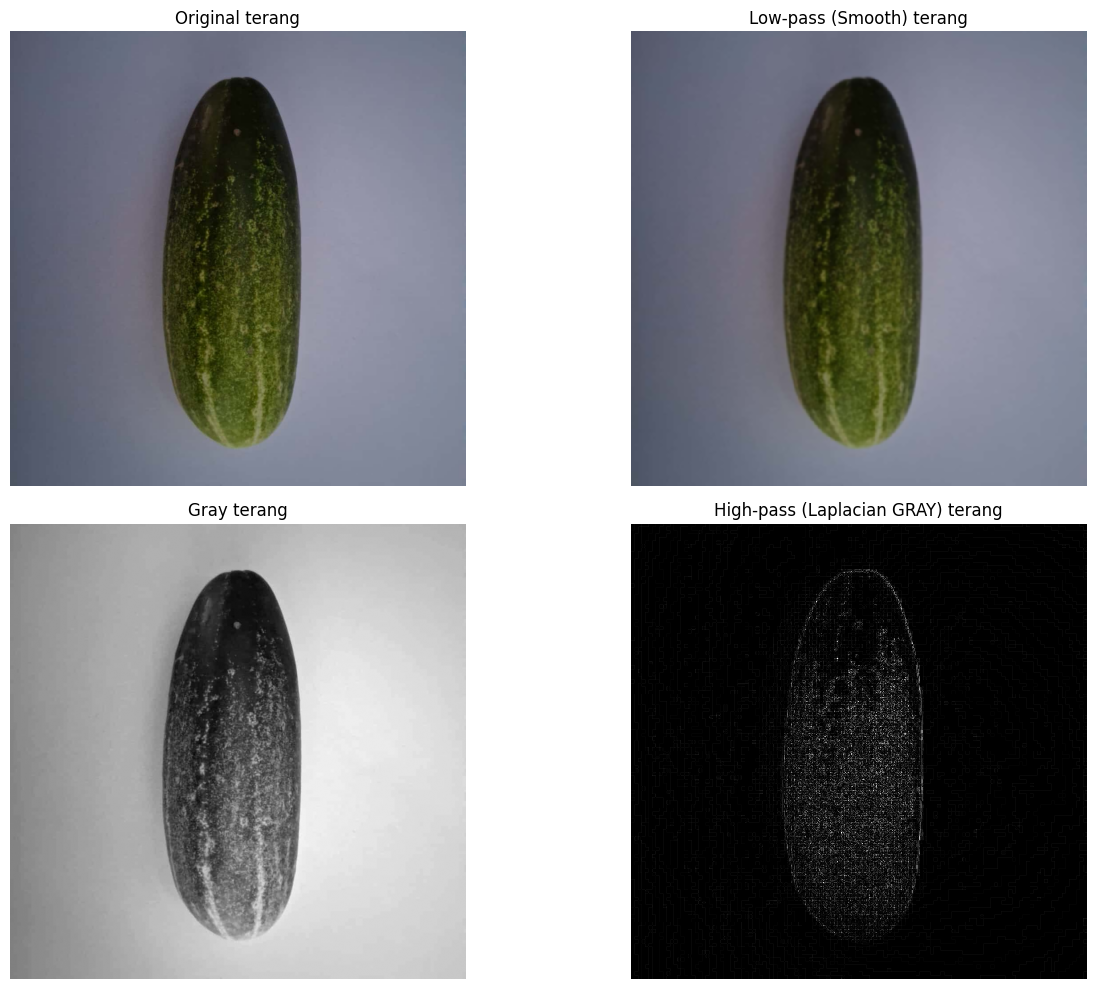

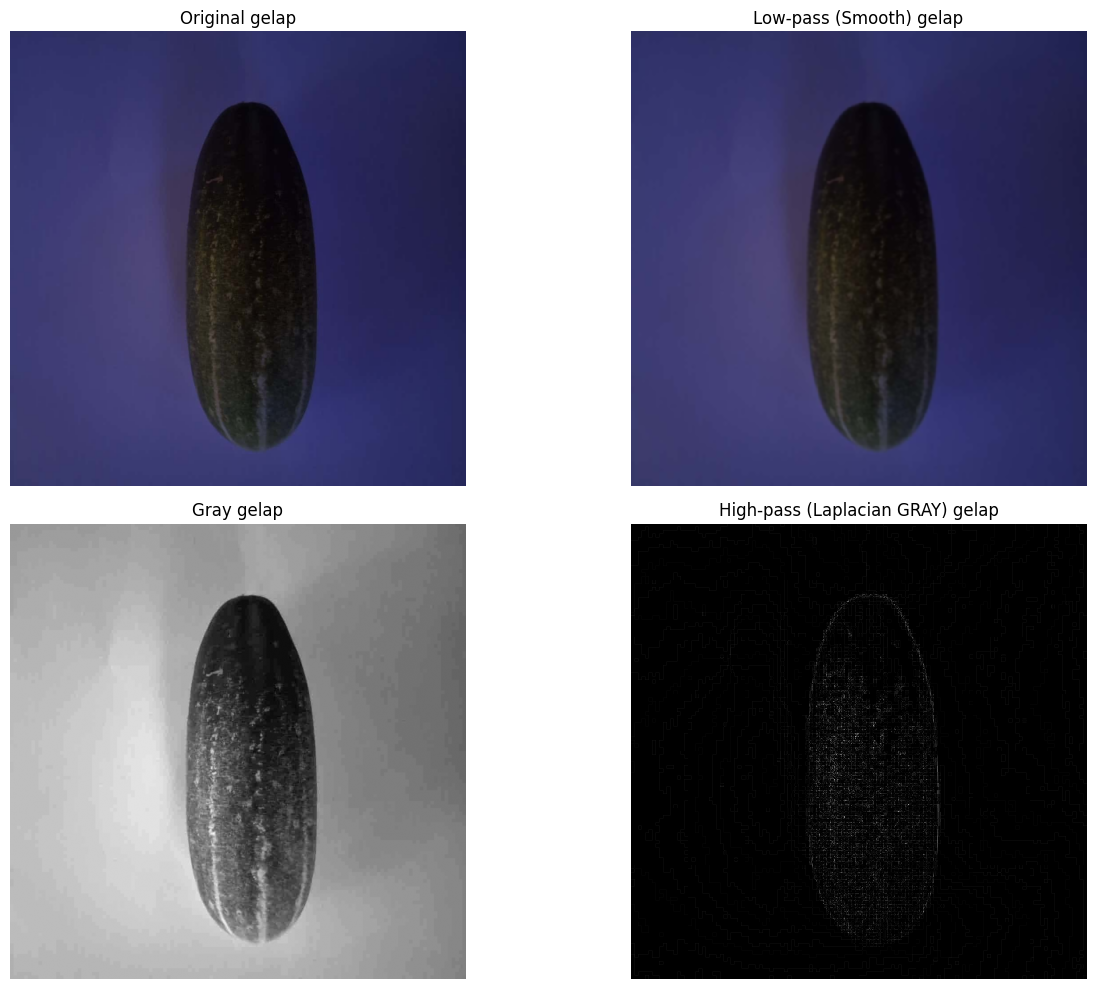

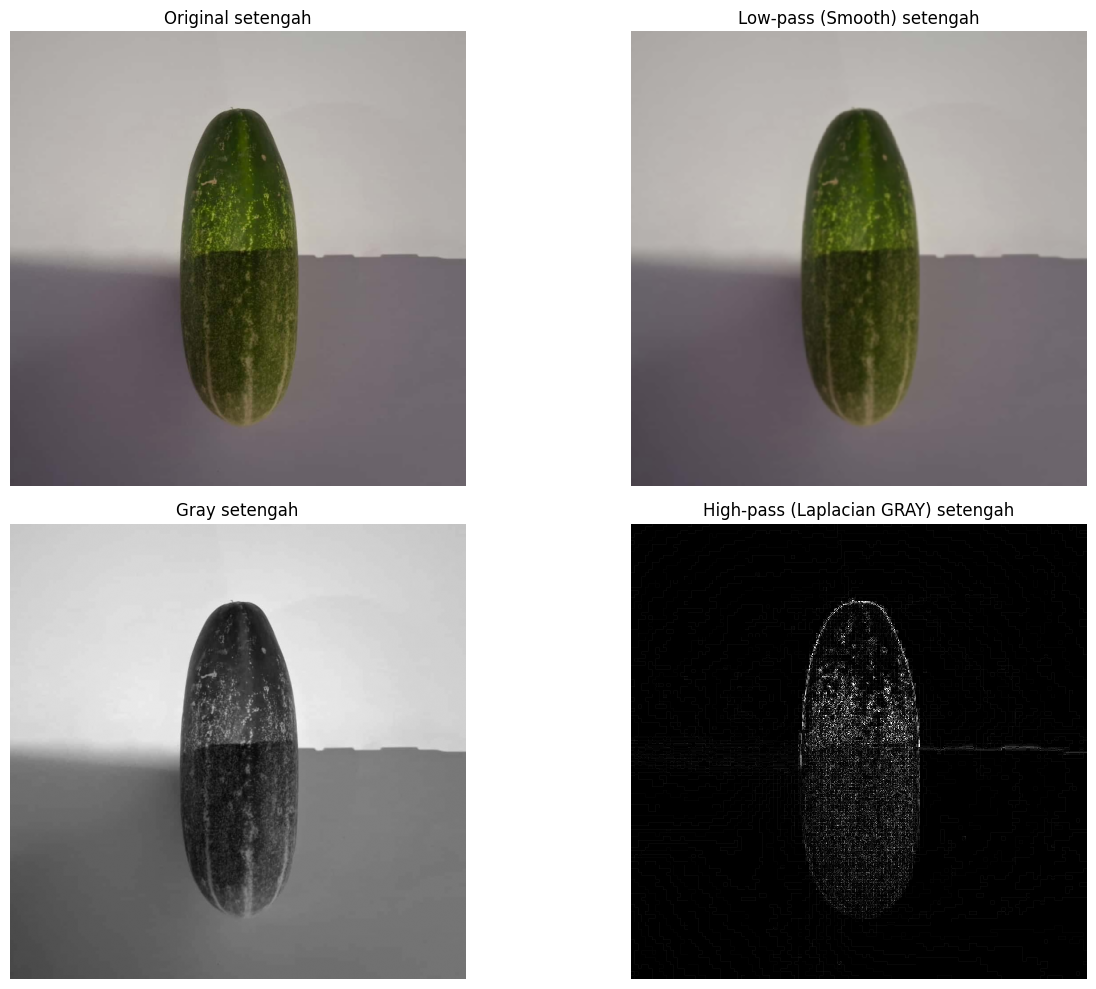

In [ ]:
timun4 = {}
for key in timun:
    timun4[key] = timun[key].copy()

    kernel = (11, 11)
    sigma = 0
    K = 3
    # kernel_laplacian = np.array([[-1, -1, -1],
    #                               [-1, 8, -1],
    #                             [-1, -1, -1]])

    lowpass = timun4[key].copy()
    lowpass = cv.GaussianBlur(lowpass, kernel, sigma)

    # kernel_size = 11
    # sigma = 0

    # gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)
    # gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.transpose()
    # lowpass = cv.cvtColor(lowpass, cv.COLOR_RGB2GRAY)
    # lowpass = convolution2d(lowpass, gaussian_kernel_2d, 1, 2)

    gray = timun4[key].copy()
    gray = cv.cvtColor(gray, cv.COLOR_RGB2GRAY)

    laplacian = cv.Laplacian(gray, cv.CV_64F, ksize=K)
    laplacian = np.clip(np.abs(laplacian), 0, 255).astype(np.uint8)

    # laplacian = convolution2d(gray, kernel_laplacian, 1, 2)

    plt.figure(figsize=(14, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(timun4[key])
    plt.title(f'Original {key}')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title(f'Low-pass (Smooth) {key}')
    # plt.imshow(lowpass)
    plt.imshow(lowpass, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(gray, cmap='gray')
    plt.title(f'Gray {key}')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    # plt.imshow(laplacian, cmap='gray')
    plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
    plt.title(f'High-pass (Laplacian GRAY) {key}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

5. Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman
warna sesuai data anda (bit-depth 4–6 bit), lalu analisis bagaimana efeknya
terhadap kehalusan gradasi warna motif batik setelah reduksi warna dilakukan
atau terhadap detail warna alami sayur

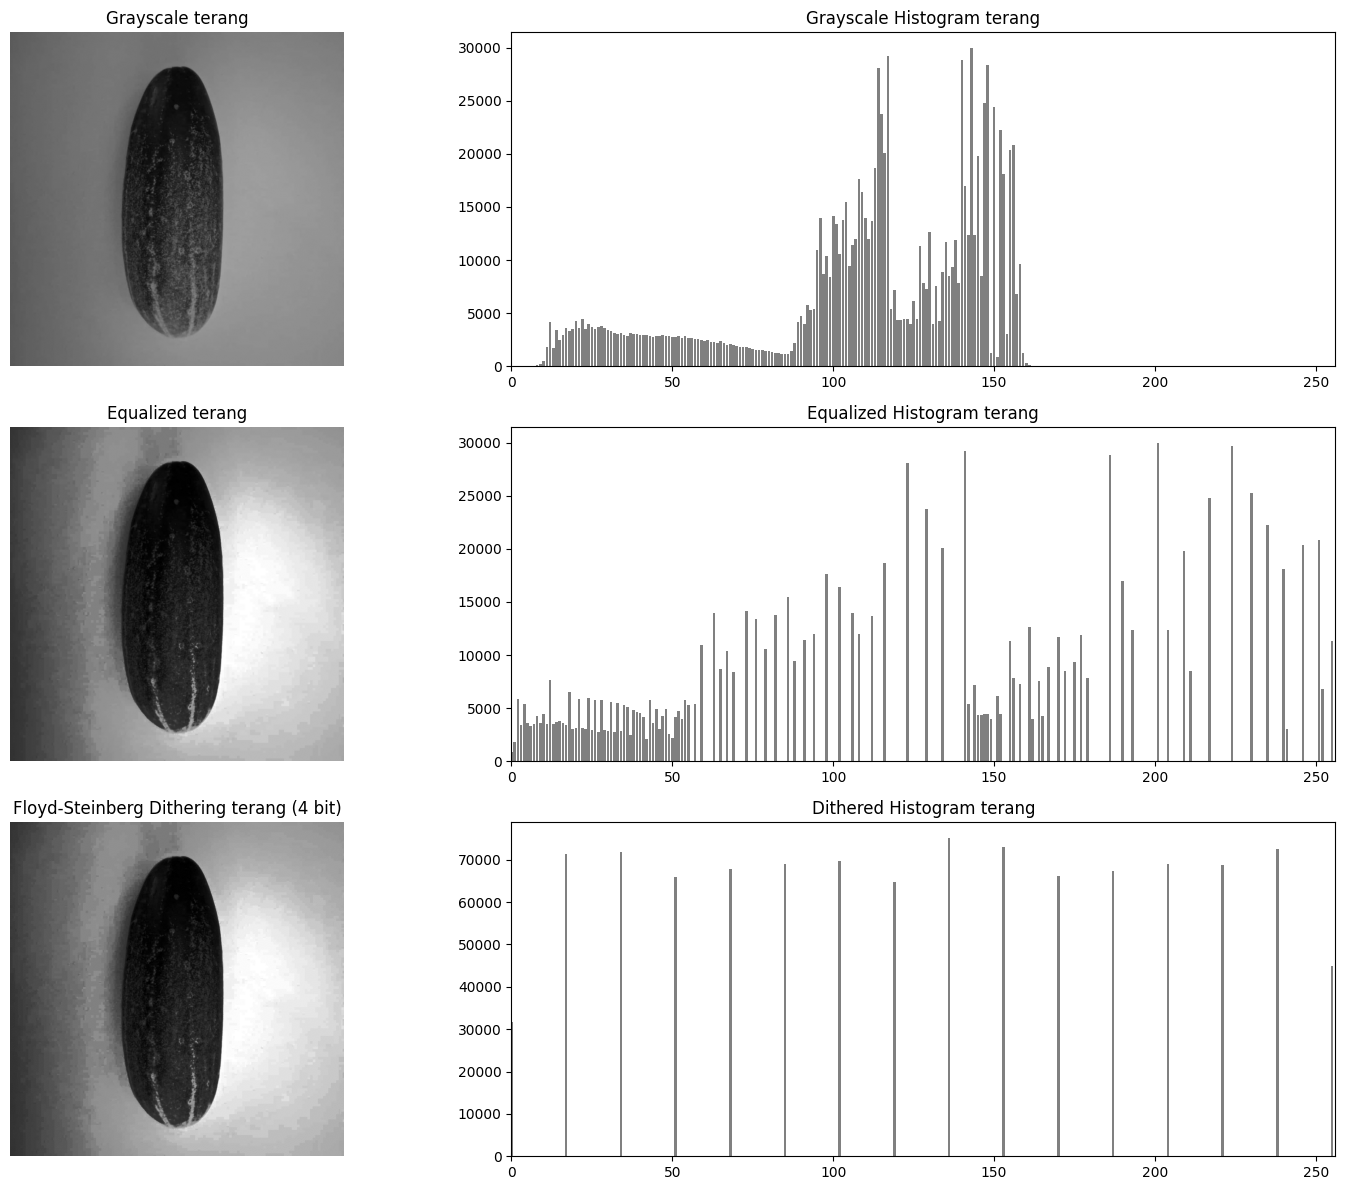

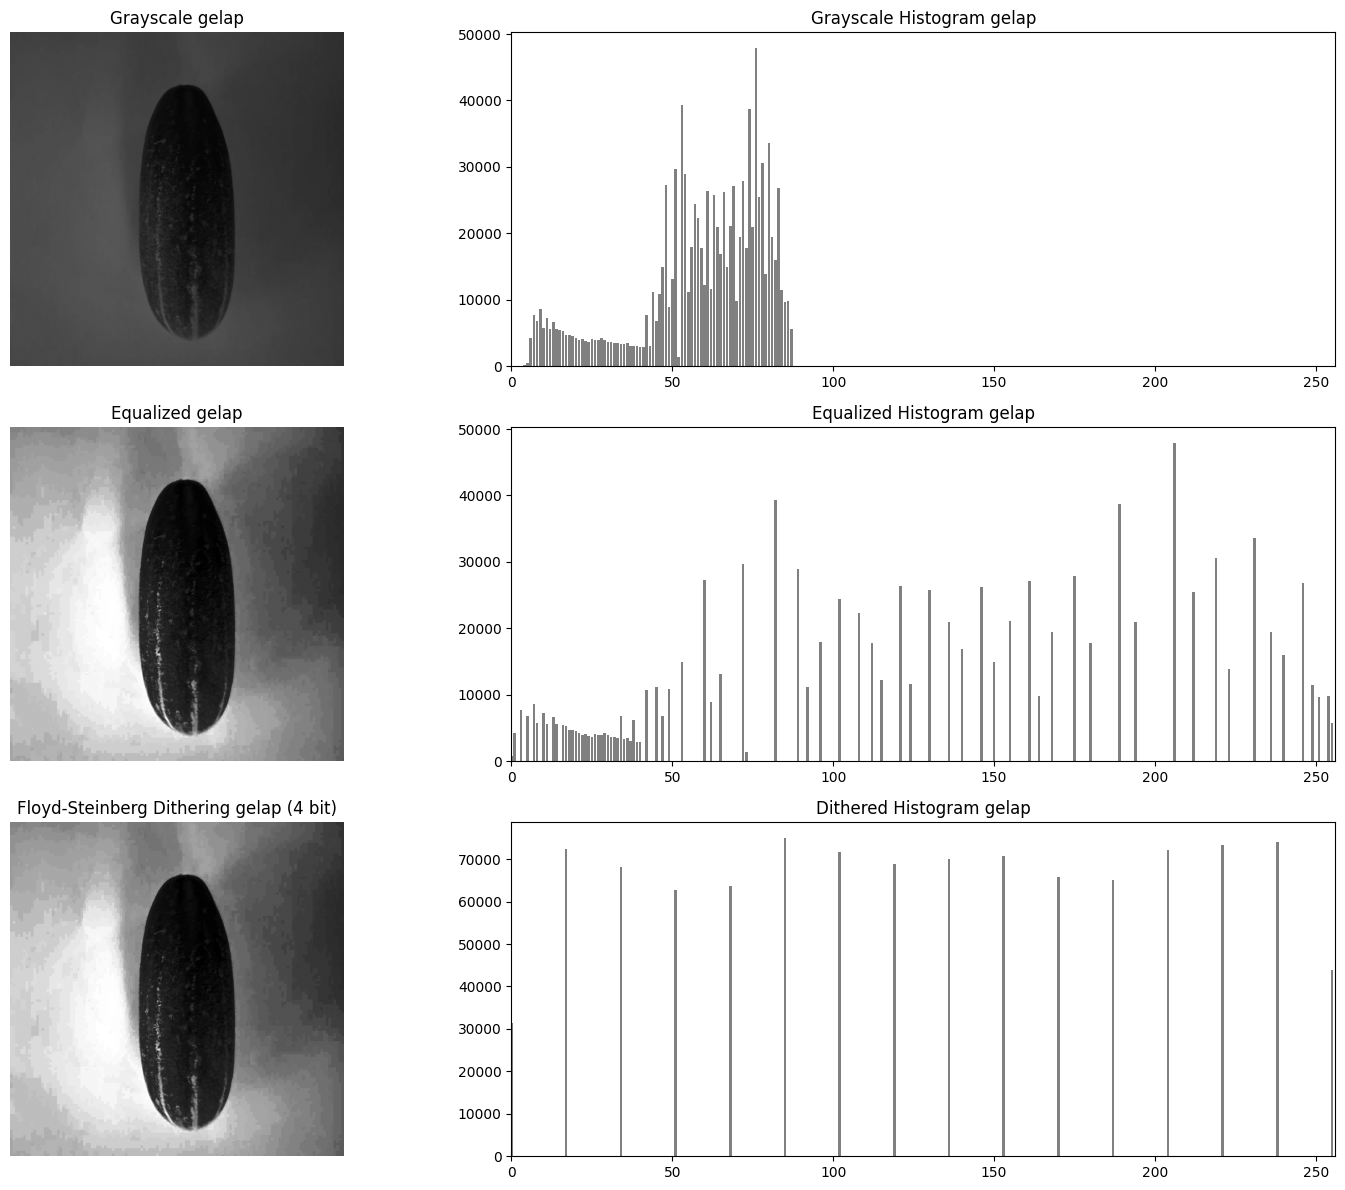

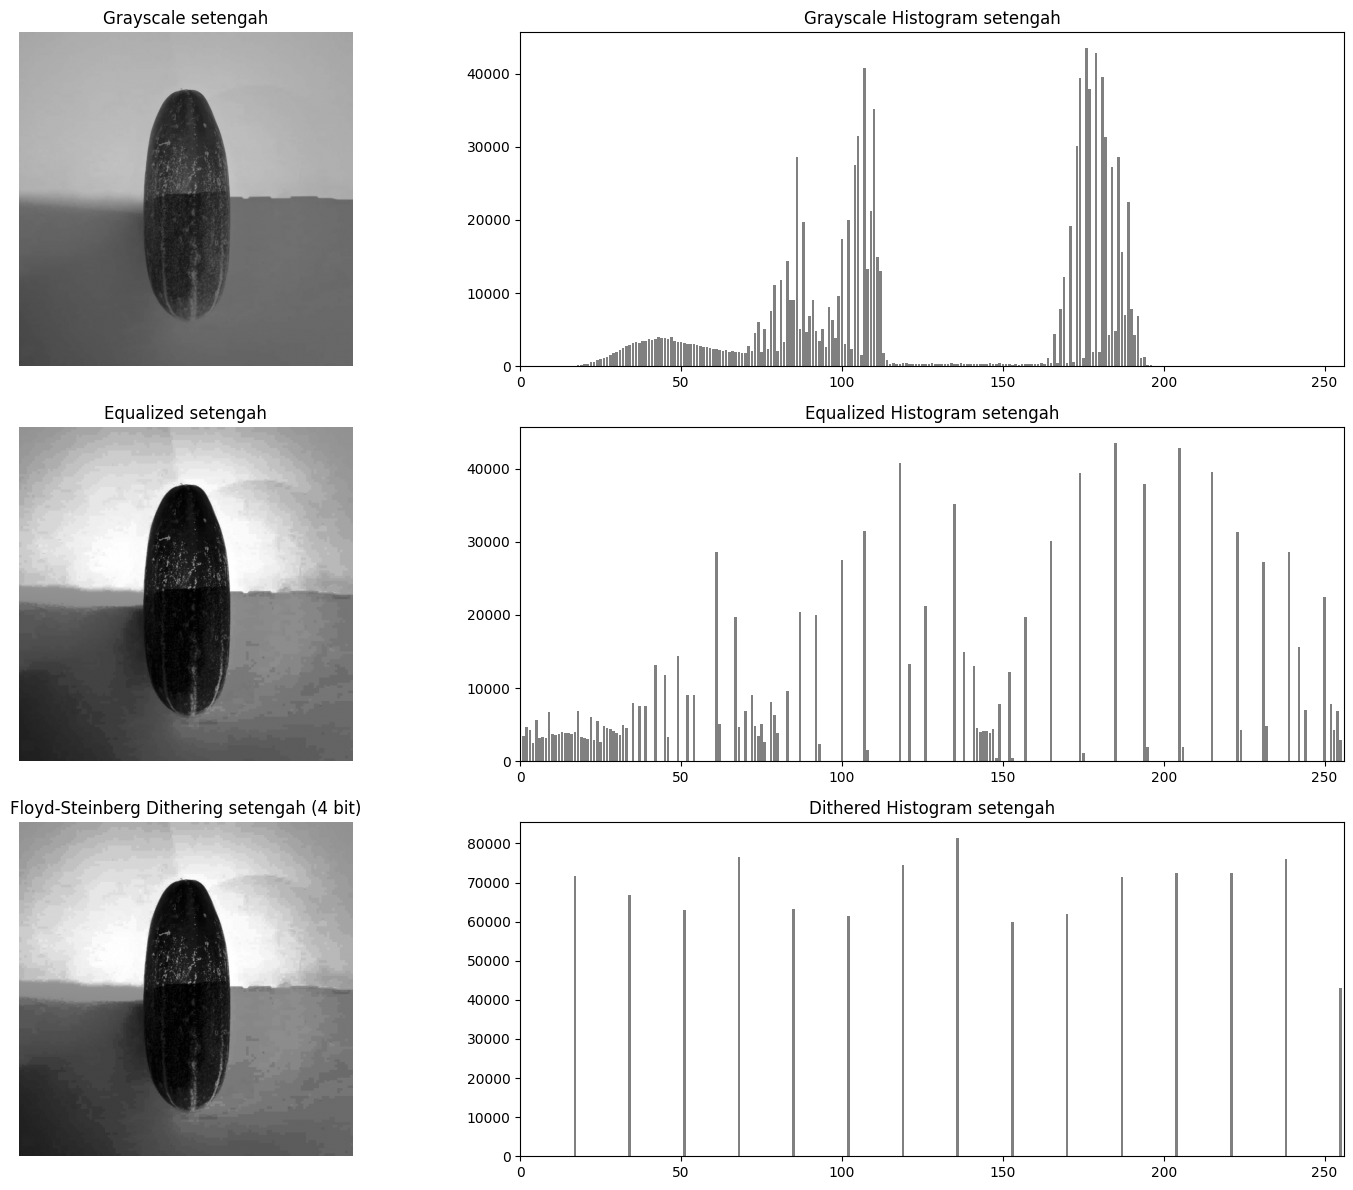

In [ ]:
timun5 = {}
for key in timun:
    timun5[key] = timun[key].copy()

    img_rgb = timun5[key]
    img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
    img_eq = cv.equalizeHist(img_gray)

    hist_gray = cv.calcHist([img_gray], [0], None, [256], [0,256])
    hist_eq = cv.calcHist([img_eq], [0], None, [256], [0,256])

    height, width = img_eq.shape
    img_dither = img_eq.astype(np.float32)

    bit_depth = 4
    levels = 2 ** bit_depth
    quant = 255 / (levels - 1)
    for y in range(height):
        for x in range(width):
            old_pixel = img_dither[y, x]
            new_pixel = round(old_pixel / quant) * quant
            img_dither[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < width:
                img_dither[y, x + 1] += quant_error * 7 / 16
            if y + 1 < height:
                if x - 1 >= 0:
                    img_dither[y + 1, x - 1] += quant_error * 3 / 16
                img_dither[y + 1, x] += quant_error * 5 / 16
                if x + 1 < width:
                    img_dither[y + 1, x + 1] += quant_error * 1 / 16

    img_dither = np.clip(img_dither, 0, 255).astype(np.uint8)
    hist_dither = cv.calcHist([img_dither], [0], None, [256], [0,256])

    plt.figure(figsize=(16, 12))

    plt.subplot(3, 2, 1)
    plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Grayscale {key}')
    plt.axis('off')

    plt.subplot(3, 2, 2)
    plt.title(f'Grayscale Histogram {key}')
    plt.bar(np.arange(256), hist_gray.ravel(), color='gray')
    plt.xlim([0, 256])

    plt.subplot(3, 2, 3)
    plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Equalized {key}')
    plt.axis('off')

    plt.subplot(3, 2, 4)
    plt.title(f'Equalized Histogram {key}')
    plt.bar(np.arange(256), hist_eq.ravel(), color='gray')
    plt.xlim([0, 256])

    plt.subplot(3, 2, 5)
    plt.imshow(img_dither, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Floyd-Steinberg Dithering {key} ({bit_depth} bit)')
    plt.axis('off')

    plt.subplot(3, 2, 6)
    plt.title(f'Dithered Histogram {key}')
    plt.bar(np.arange(256), hist_dither.ravel(), color='gray')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

Bagian C – Implementasi (Python–OpenCV)

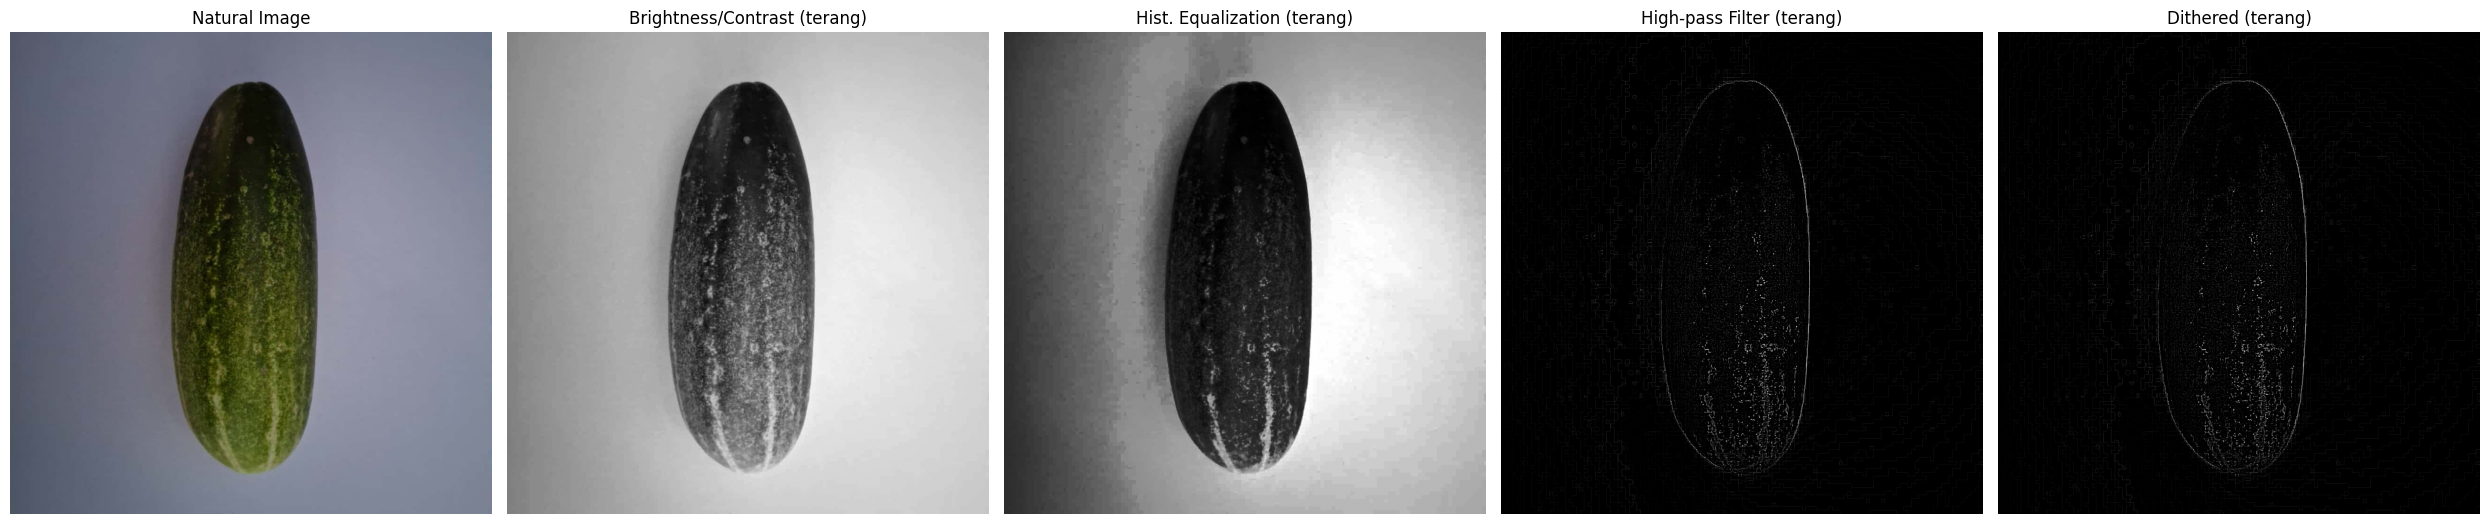

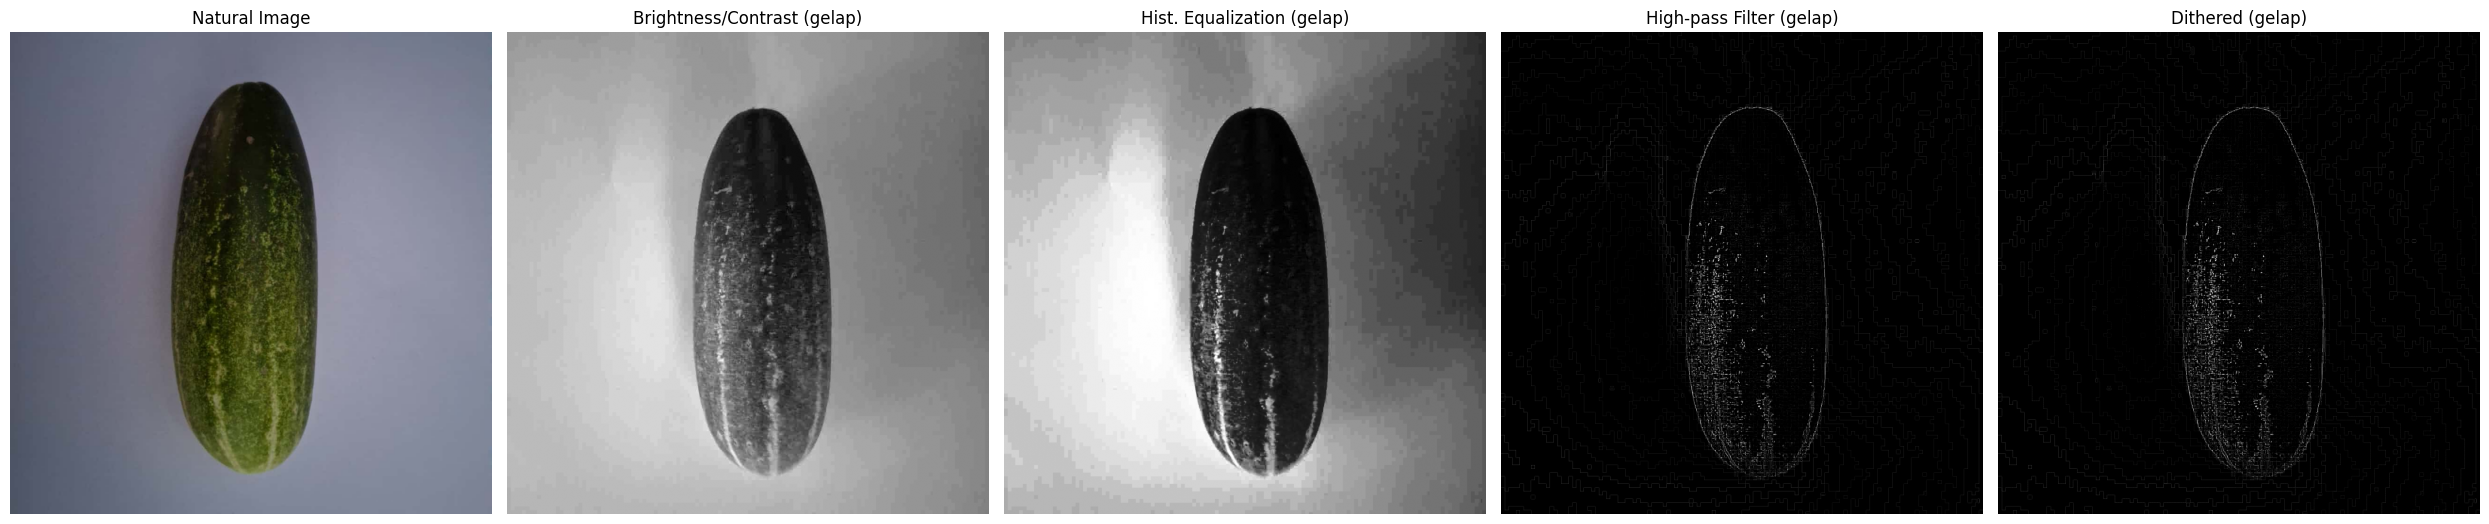

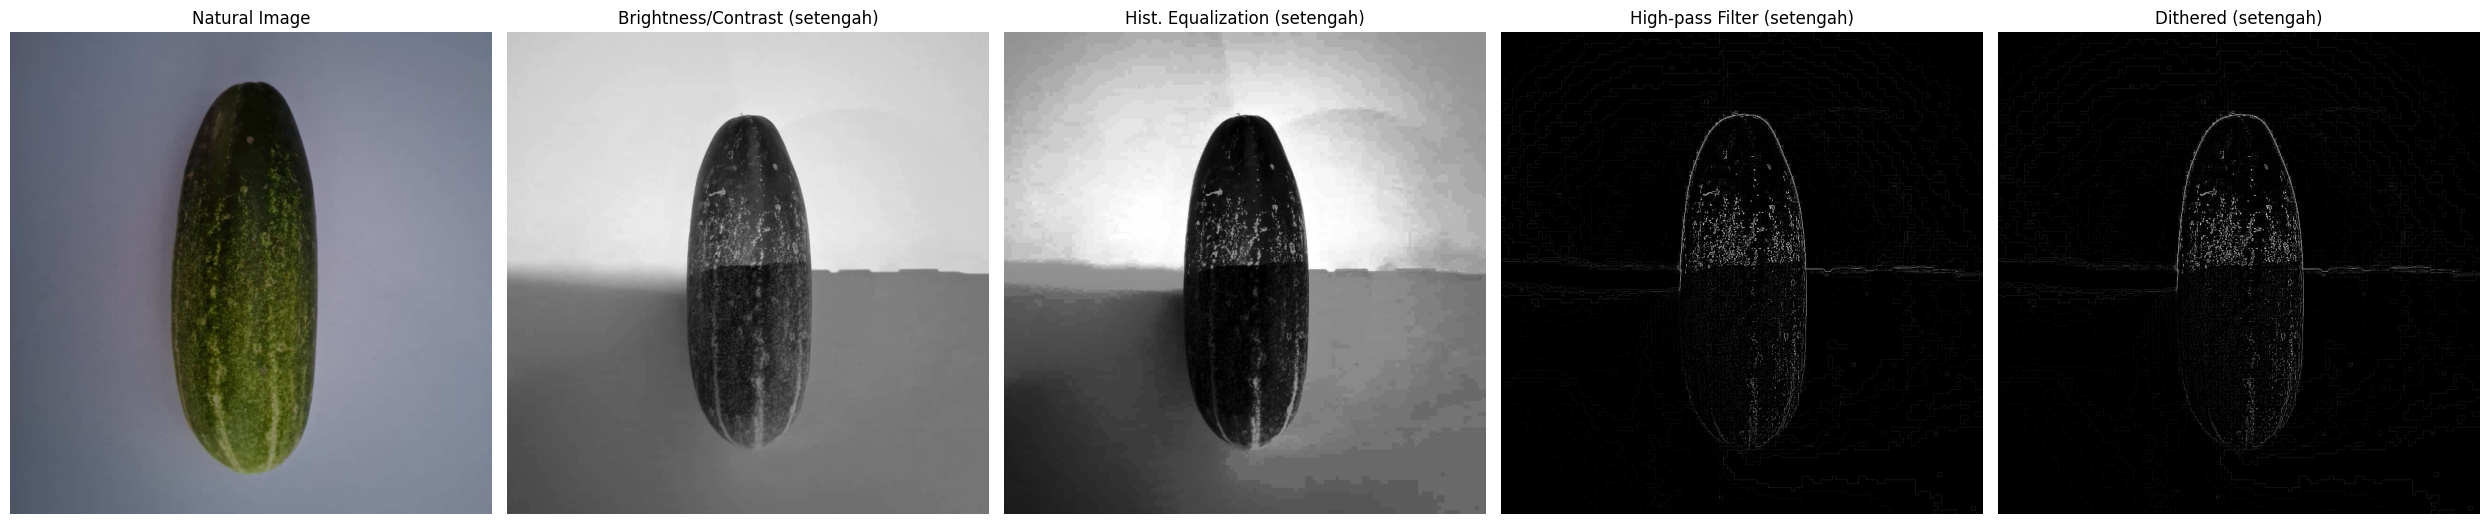

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

timunC = {}
for key in timun:
    timunC[key] = timun[key].copy()

a_values = {'terang': 1, 'gelap': 1.99, 'setengah': 0.9}
b_values = {'terang': 1, 'gelap': 20, 'setengah': -10}

for key in timunC:
    image_to_process = timunC[key]
    # Konversi ke grayscale
    gray = cv2.cvtColor(image_to_process, cv2.COLOR_RGB2GRAY)

    a = a_values[key]
    b = b_values[key]
    # Brightness & Contrast
    img_bc = cv2.convertScaleAbs(gray, alpha=a, beta=b)
    # Histogram Equalization
    img_he = cv2.equalizeHist(img_bc)
    # High-pass Filtering
    kernel_hp = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img_hp = cv2.filter2D(img_he, -1, kernel_hp)
    # Dithering
    height, width = img_hp.shape
    img_dither = img_hp.astype(np.float32)

    bit_depth = 4
    levels = 2 ** bit_depth
    quant = 255 / (levels - 1)
    for y in range(height):
        for x in range(width):
            old_pixel = img_dither[y, x]
            new_pixel = round(old_pixel / quant) * quant
            img_dither[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < width:
                img_dither[y, x + 1] += quant_error * 7 / 16
            if y + 1 < height:
                if x - 1 >= 0:
                    img_dither[y + 1, x - 1] += quant_error * 3 / 16
                img_dither[y + 1, x] += quant_error * 5 / 16
                if x + 1 < width:
                    img_dither[y + 1, x + 1] += quant_error * 1 / 16

    img_dither = np.clip(img_dither, 0, 255).astype(np.uint8)

    plt.figure(figsize=(25, 6))
    plt.subplot(1, 5, 1)
    plt.title('Natural Image')
    plt.imshow(timun['terang'])
    plt.axis('off')
    plt.subplot(1, 5, 2)
    plt.title(f'Brightness/Contrast ({key})')
    plt.imshow(img_bc, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 5, 3)
    plt.title(f'Hist. Equalization ({key})')
    plt.imshow(img_he, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 5, 4)
    plt.title(f'High-pass Filter ({key})')
    plt.imshow(img_hp, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 5, 5)
    plt.title(f'Dithered ({key})')
    plt.imshow(img_dither, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

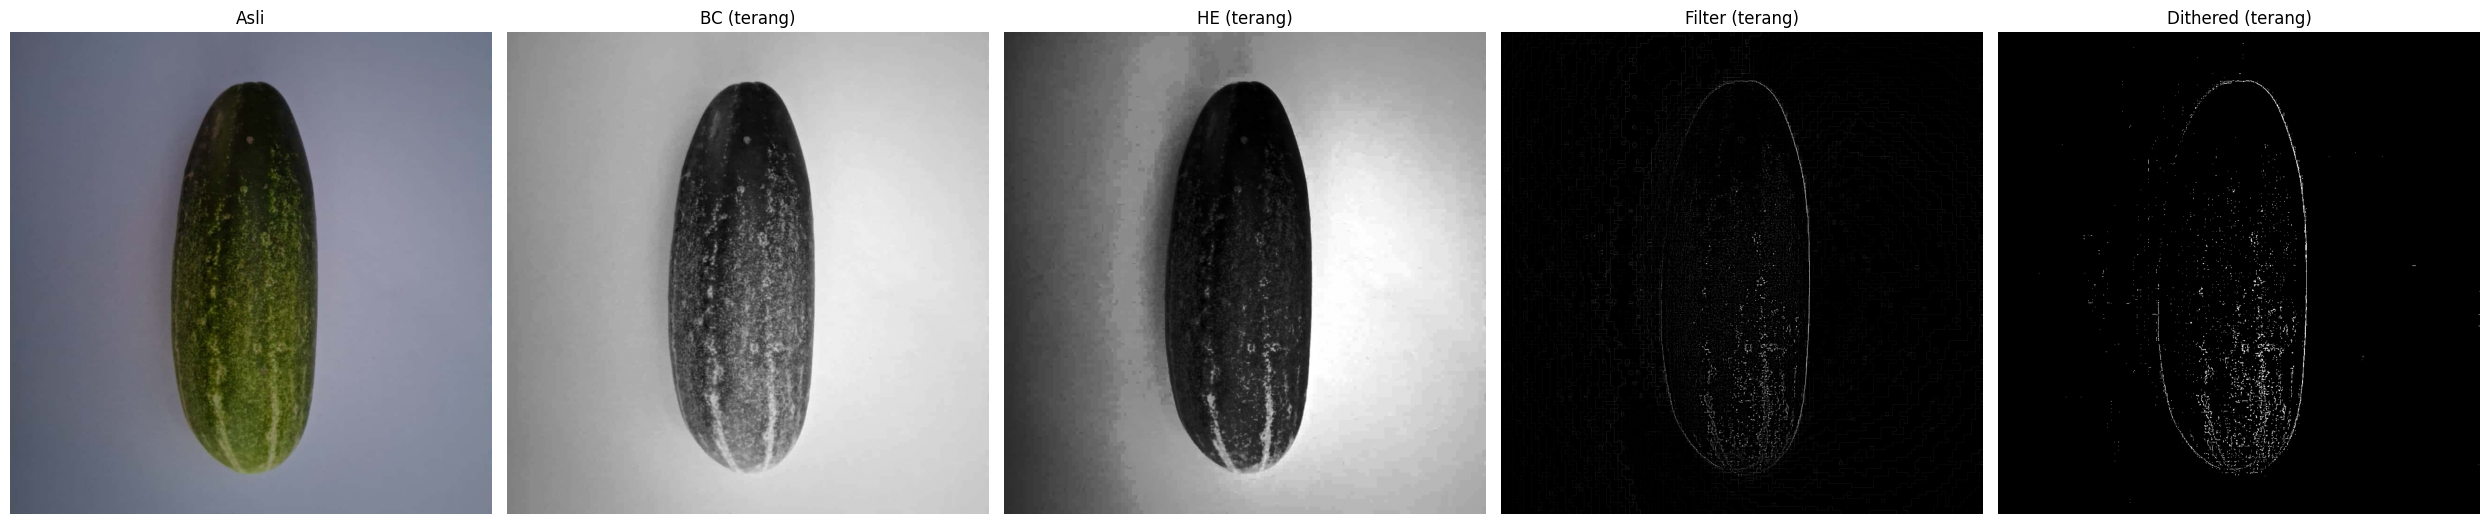

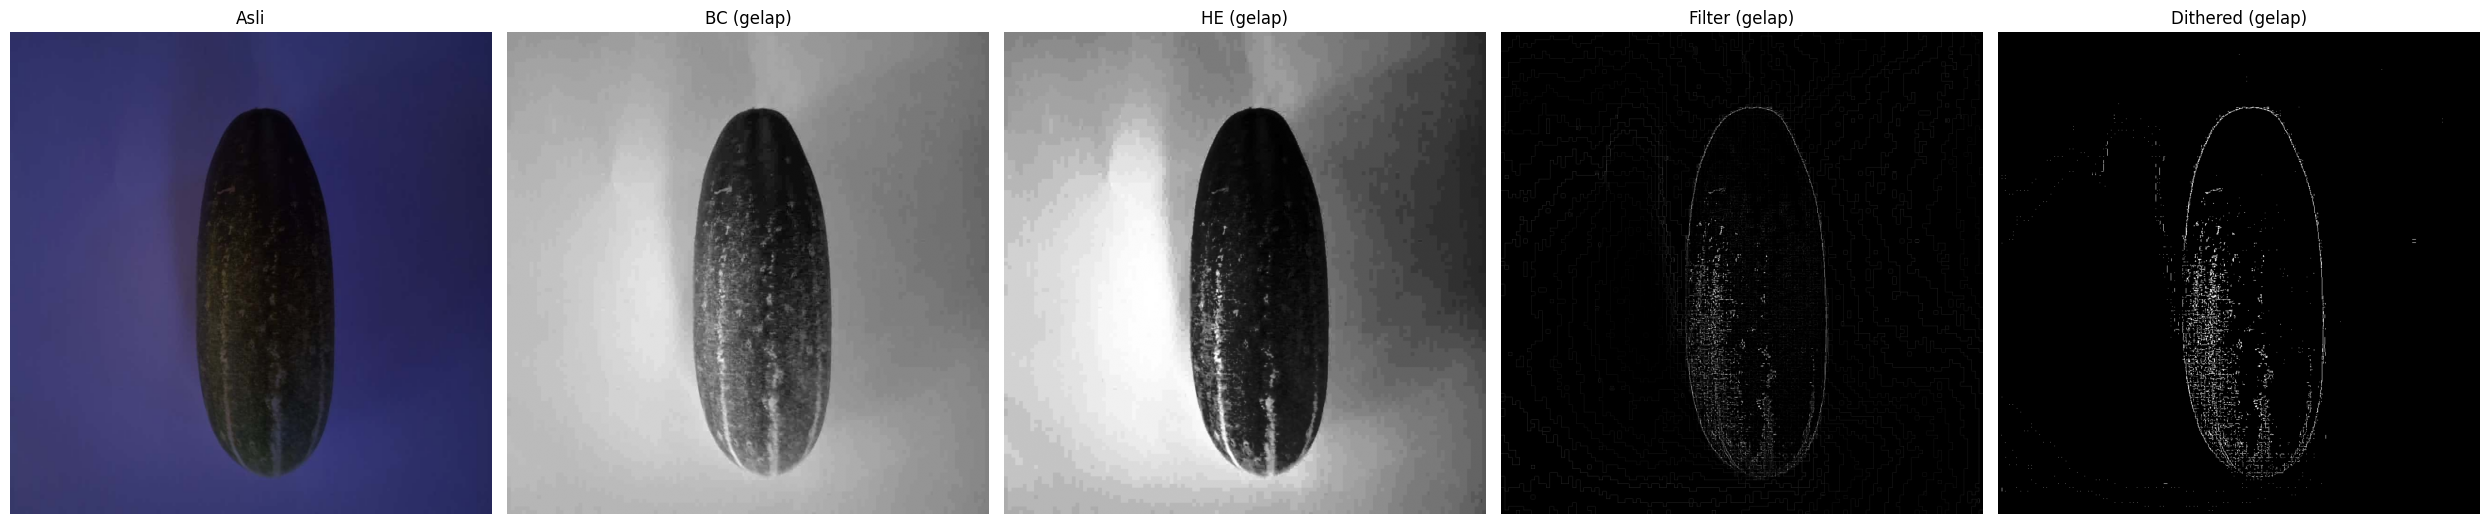

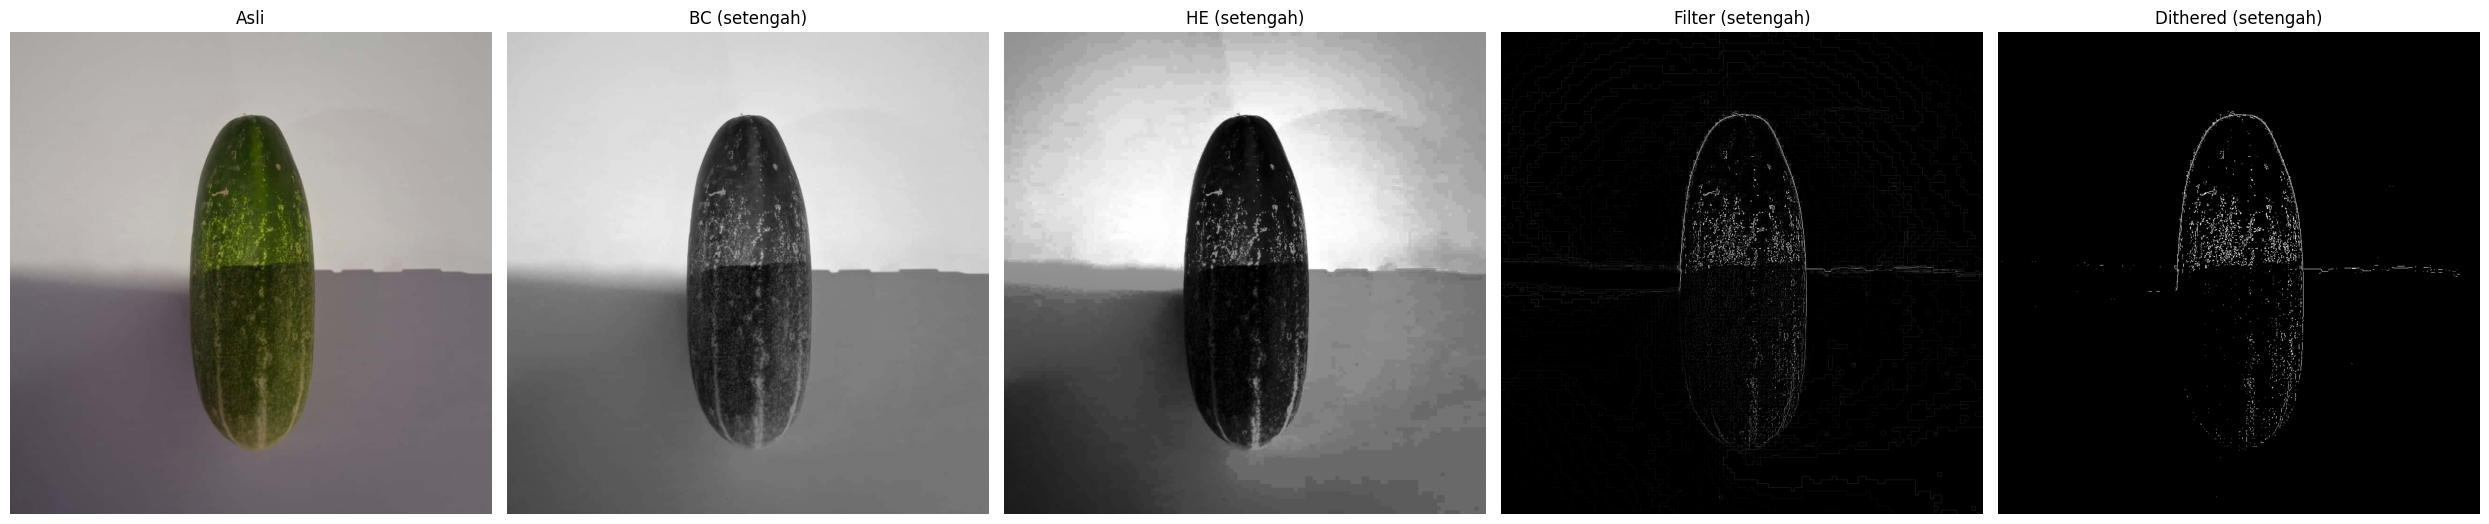

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

timunC = {}
for key in timun:
    timunC[key] = timun[key].copy()

a_values = {'terang': 1, 'gelap': 1.99, 'setengah': 0.9}
b_values = {'terang': 1, 'gelap': 20, 'setengah': -10}

for key in timunC:
    image_to_process = timunC[key]
    # Konversi ke grayscale
    gray = cv2.cvtColor(image_to_process, cv2.COLOR_RGB2GRAY)

    a = a_values[key]
    b = b_values[key]
    # Brightness & Contrast
    img_bc = cv2.convertScaleAbs(gray, alpha=a, beta=b)
    # Histogram Equalization
    img_he = cv2.equalizeHist(img_bc)
    # High-pass Filtering
    kernel_hp = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img_hp = cv2.filter2D(img_he, -1, kernel_hp)
    # Dithering
    _, img_dither = cv2.threshold(img_hp, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    plt.figure(figsize=(25, 6))
    plt.subplot(1, 5, 1)
    plt.title('Asli')
    plt.imshow(timunC[key])
    plt.axis('off')
    plt.subplot(1, 5, 2)
    plt.title(f'BC ({key})')
    plt.imshow(img_bc, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 5, 3)
    plt.title(f'HE ({key})')
    plt.imshow(img_he, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 5, 4)
    plt.title(f'Filter ({key})')
    plt.imshow(img_hp, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 5, 5)
    plt.title(f'Dithered ({key})')
    plt.imshow(img_dither, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

def psnr(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

def process_image(gray, process_order, a, b):
    result = gray.copy()
    results = {'asli': gray.copy()}
    for step in process_order:
        if step == 'bc':
            result = cv2.convertScaleAbs(result, alpha=a, beta=b)
        elif step == 'he':
            result = cv2.equalizeHist(result)
        elif step == 'filter':
            kernel_hp = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
            result = cv2.filter2D(result, -1, kernel_hp)
        elif step == 'dither':
            _, result = cv2.threshold(result, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        results[step] = result.copy()
    return results

timunC = {}
for key in timun:
    timunC[key] = timun[key].copy()

a_values = {'terang': 1, 'gelap': 1.99, 'setengah': 0.9}
b_values = {'terang': 1, 'gelap': 20, 'setengah': -10}

steps = ['bc', 'he', 'filter', 'dither']
all_orders = list(permutations(steps, 4))

for key in timunC:
    image_to_process = timunC[key]
    gray = cv2.cvtColor(image_to_process, cv2.COLOR_RGB2GRAY)
    a = a_values[key]
    b = b_values[key]
    print(f"\nGambar: {key}\n===============================")
    for idx, process_order in enumerate(all_orders, 1):
        results = process_image(gray, process_order, a, b)
        titles = ['Asli'] + [step.upper() for step in process_order]
        imgs = [results['asli']] + [results[step] for step in process_order]
        psnr_vals = [None] + [psnr(results['asli'], results[step]) for step in process_order]
        plt.figure(figsize=(22, 4))
        for i, (title, img, psnr_val) in enumerate(zip(titles, imgs, psnr_vals)):
            plt.subplot(1, len(titles), i+1)
            plt.title(title)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            if i > 0:
                plt.xlabel(f'PSNR: {psnr_val:.2f} dB')
        plt.suptitle(f"Urutan ke-{idx}: {process_order}")
        plt.tight_layout()
        plt.show()